In [96]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

A = pd.read_csv("C:/Users/Anuj.kumar/Desktop/HR-Employee-Attrition-Table 1.csv")

In [2]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
A.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see data need not to replace any value but still Replacer and Preprocessing function we will create

# Replacer

In [4]:
def replacer(df):
    T=pd.DataFrame(df.isna().sum(), columns=['misval'])
    Q = T[T.misval > 0]
    for i in Q.index:
        if df[i].dtypes == "object":
            mode = df[i].mode()[0]
            df[i]=df[i].fillna(mode)
        else:
            mean = round(df[i].mean(), 2)
            df[i] = df[i].fillna(mean)

In [5]:
A["EducationField"].mode()[0]

'Life Sciences'

In [6]:
A["Age"].mean()

36.923809523809524

In [7]:
for i in A.columns:
    print(i, len(A[i].unique()))

Attrition 2
Age 43
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


# Exploratory Data Analysis

# Univariate Analysis

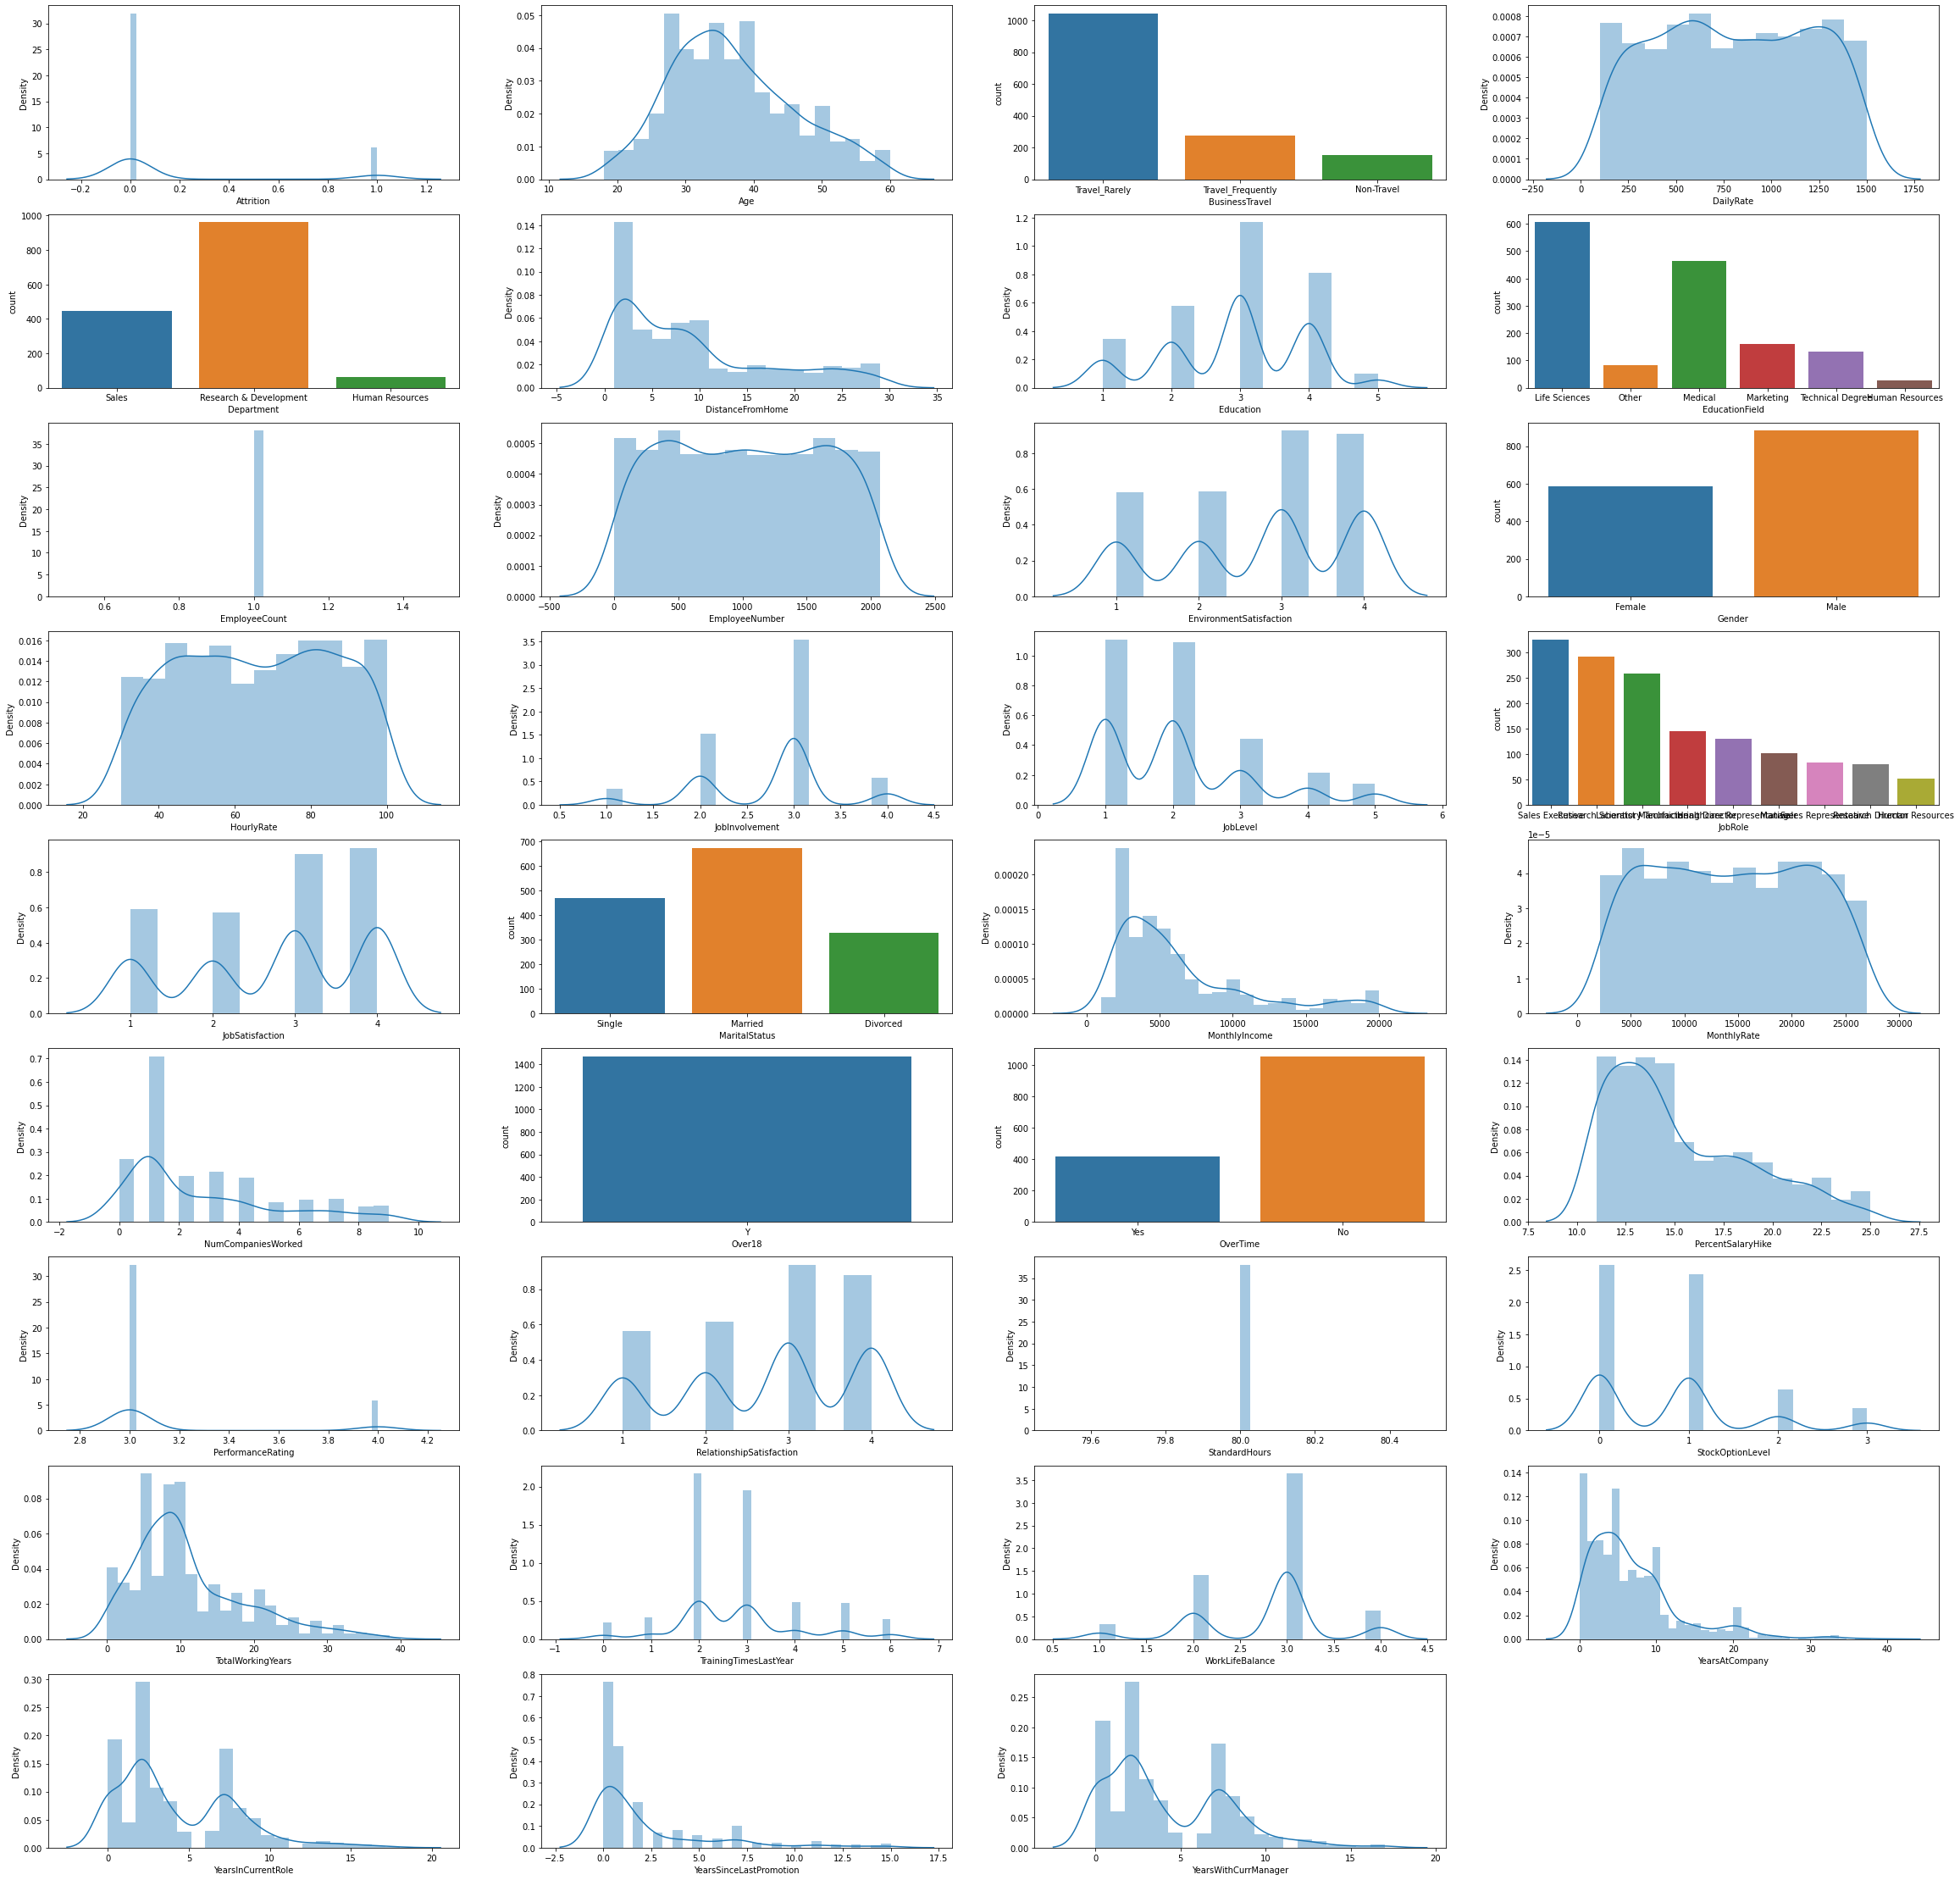

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(40,40))
for i in A.columns:
    if A[i].dtypes == 'object':
        plt.subplot(9,4,x)
        sns.countplot(A[i])
        x = x + 1
    else:
        plt.subplot(9,4,x)
        sns.distplot(A[i])
        x = x+1

# Define X and Y

In [9]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [97]:
X = A.drop(['EmployeeNumber', "MonthlyRate",'Over18', 'StandardHours', 'EmployeeCount'], axis=1)
Y = A[["MonthlyRate"]]

In [98]:
cat=[]
con=[]

In [99]:
for i in X.columns:
    if(X[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

# Anova

In [57]:
def anova(df,con,cat):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    rel=con+ "~"+cat
    model=ols(rel,df).fit()
    anova_result=anova_lm(model)
    Df=pd.DataFrame(anova_result)
    q=Df["PR(>F)"][cat]
    q=round(q,4)
    return q

In [58]:
for i in cat:
    print("MonthlyRate ~",i,"---->",anova(A,"MonthlyRate",i))

MonthlyRate ~ BusinessTravel ----> 0.8376
MonthlyRate ~ Department ----> 0.5697
MonthlyRate ~ EducationField ----> 0.7529
MonthlyRate ~ Gender ----> 0.1119
MonthlyRate ~ JobRole ----> 0.779
MonthlyRate ~ MaritalStatus ----> 0.3097
MonthlyRate ~ OverTime ----> 0.4116


In [59]:
A.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010577,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


# Bivariate Analysis

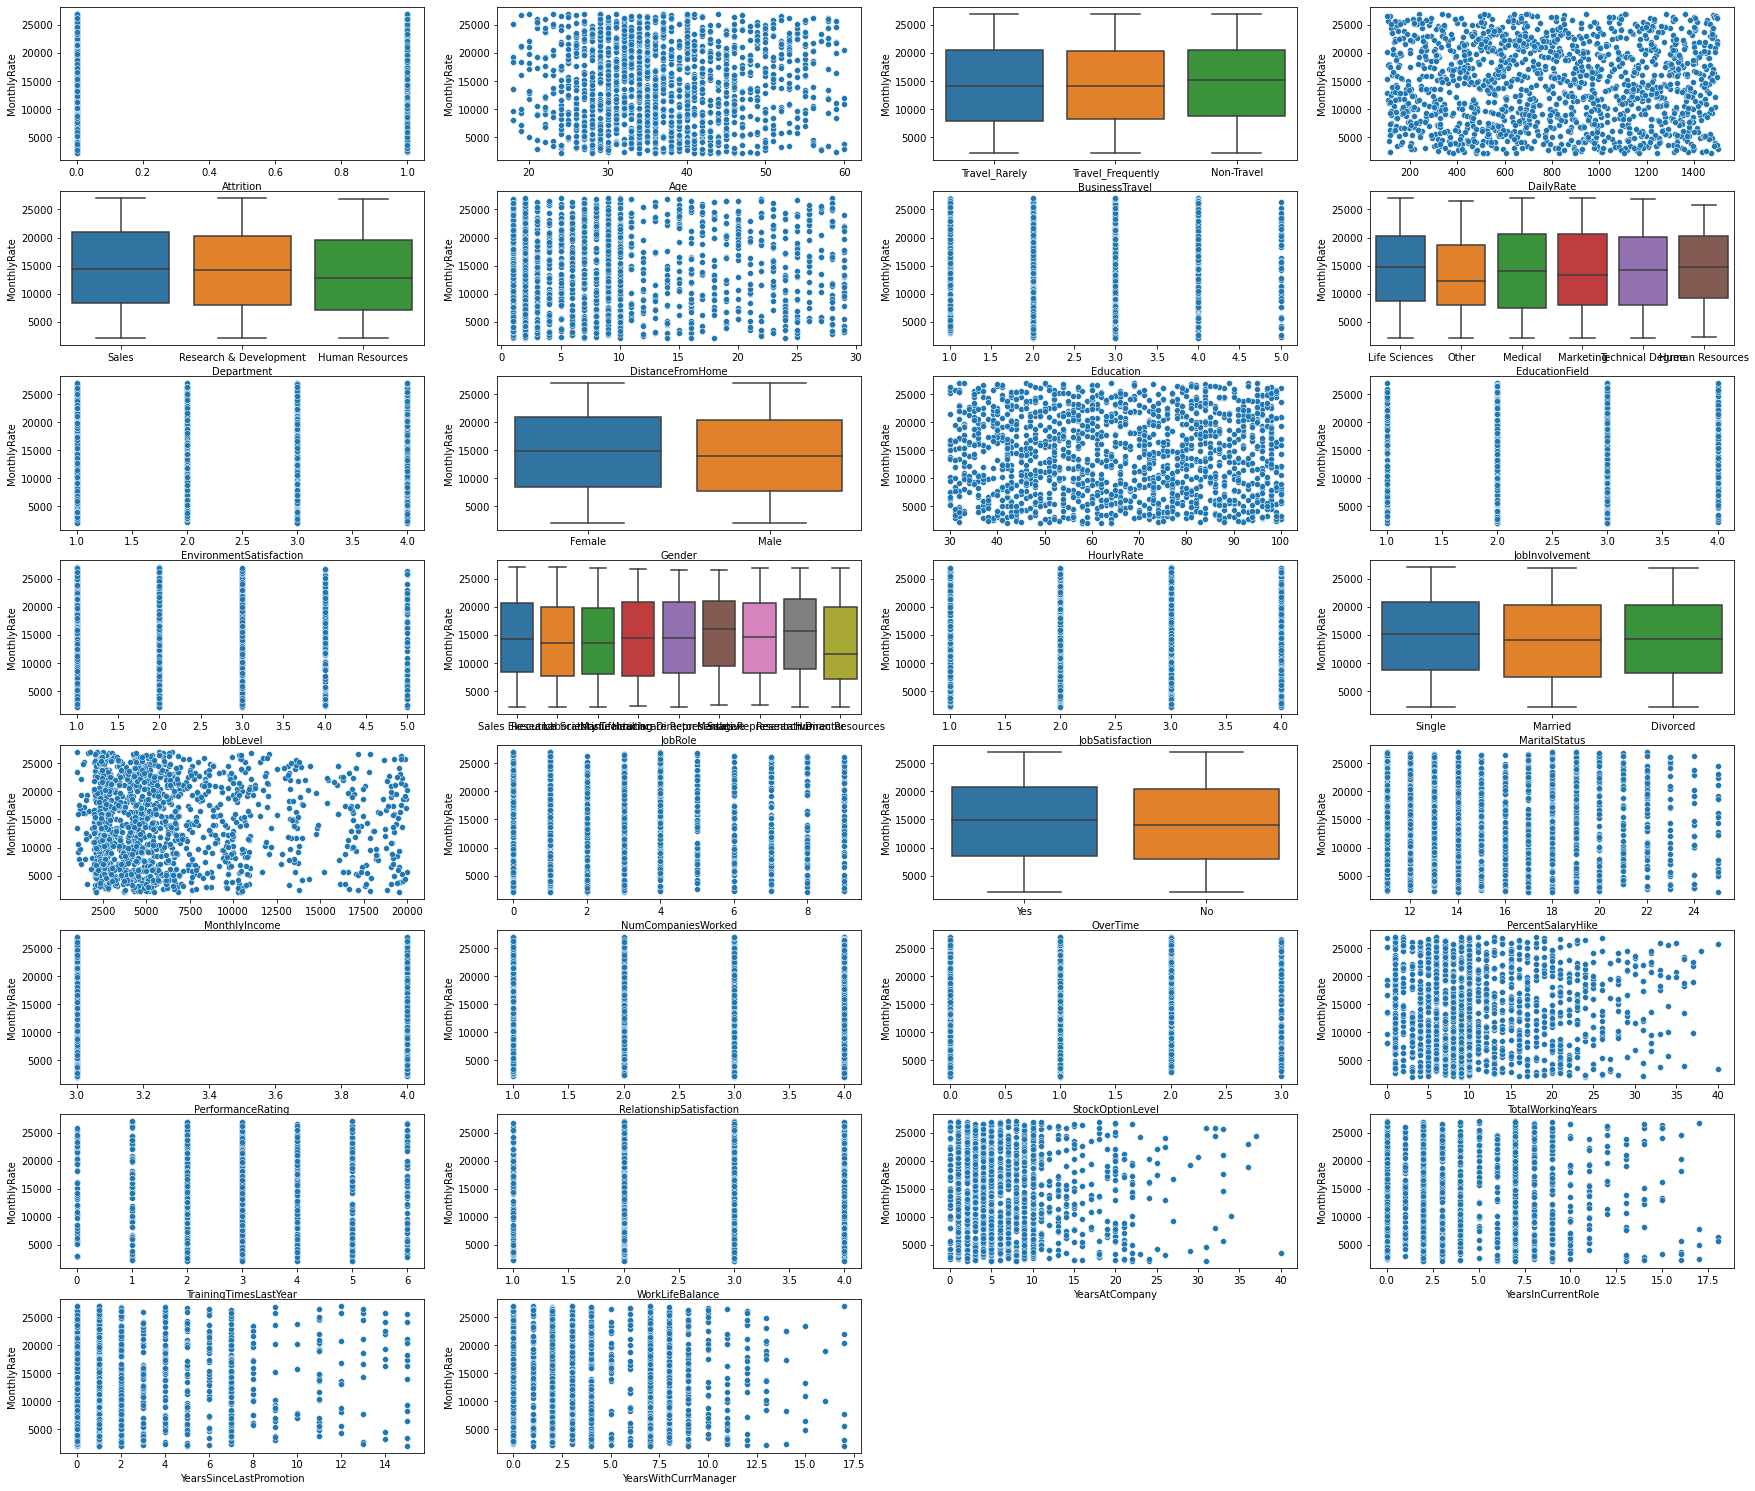

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(30,30))
for i in X.columns:
    if X[i].dtypes == 'object':
        plt.subplot(9,4,x)
        sns.boxplot(X[i],Y['MonthlyRate'])
        x = x + 1
    else:
        plt.subplot(9,4,x)
        sns.scatterplot(X[i], Y['MonthlyRate'])
        x=x+1

# Preprocessing

In [101]:
def preprocessing(X):
    import pandas as pd
    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes =='object'):
            cat.append(i)
        else:
            con.append(i)

    X1 = pd.get_dummies(X[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

    X3 = X2.join(X1)
    return X3

In [102]:
X1=preprocessing(X)

In [103]:
X1.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.280906,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,-0.438422,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,2.280906,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.438422,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-0.438422,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


# OLS

In [104]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain, xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8961
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.666
Time:                        21:20:34   Log-Likelihood:                -12076.
No. Observations:                1176   AIC:                         2.424e+04
Df Residuals:                    1131   BIC:                         2.447e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              4193.5953    213.846     19.610      0.000    3774.015    4613.175
Attrition                            58.0593    240.672      0.241      0.809    -414.154     530.273
Age                                 318.9413    304.573      1.047      0.295    -278.650     916.532
DailyRate                          -190.0312    211.145     -0.900      0.368    -604.311     224.248
DistanceFromHome                    328.5912    211.166      1.556      0.120     -85.730     742.912
Education                          -258.2281    213.901     -1.207      0.228    -677.915     161.459
EnvironmentSatisfaction             490.1876    213.509      2.296      0.022      71.269     909.107
HourlyRate                          -15.9243    211.207     -0.075      0.940    -430.326     398.478
JobInvolvement                     -221.9406    212.865     -1.043      0.297    -639.596     195.715
JobLevel                            423.5658    771.105      0.549      0.583   -1089.392    1936.523
JobSatisfaction                     -30.6655    211.194     -0.145      0.885    -445.041     383.710
MonthlyIncome                      -981.5022    877.494     -1.119      0.264   -2703.202     740.198
NumCompaniesWorked                   63.4371    235.750      0.269      0.788    -399.119     525.993
PercentSalaryHike                   -22.4919    329.596     -0.068      0.946    -669.181     624.197
PerformanceRating                   -64.4589    337.806     -0.191      0.849    -727.255     598.337
RelationshipSatisfaction             26.6212    211.448      0.126      0.900    -388.252     441.495
StockOptionLevel                   -182.5876    284.060     -0.643      0.520    -739.931     374.756
TotalWorkingYears                    35.1135    478.294      0.073      0.941    -903.331     973.558
TrainingTimesLastYear                28.6036    215.229      0.133      0.894    -393.689     450.896
WorkLifeBalance                     158.7969    210.997      0.753      0.452    -255.194     572.787
YearsAtCompany                     -345.2335    455.850     -0.757      0.449   -1239.641     549.174
YearsInCurrentRole                  -44.9754    343.140     -0.131      0.896    -718.237     628.286
YearsSinceLastPromotion             151.3997    280.894      0.539      0.590    -399.732     702.532
YearsWithCurrManager               -315.3392    343.893     -0.917      0.359    -990.080     359.401
BusinessTravel_Non-Travel          1098.6542    494.032      2.224      0.026     129.331    2067.977
BusinessTravel_Travel_Frequently   1557.4597    408.005      3.817      0.000     756.928    2357.992
BusinessTravel_Travel_Rarely       1537.4814    306.828      5.011      0.000     935.466    2139.497
Department_Human Resour

In [16]:
model.pvalues.sort_values()

const                                6.165535e-74
Gender_Female                        5.816979e-22
OverTime_Yes                         9.804691e-17
Gender_Male                          1.237349e-13
OverTime_No                          9.675700e-13
BusinessTravel_Travel_Rarely         6.282836e-07
MaritalStatus_Divorced               1.303989e-04
BusinessTravel_Travel_Frequently     1.422602e-04
MaritalStatus_Married                1.575987e-04
MaritalStatus_Single                 6.236856e-04
Department_Research & Development    1.372853e-02
EducationField_Human Resources       1.861053e-02
EnvironmentSatisfaction              2.186613e-02
BusinessTravel_Non-Travel            2.635541e-02
JobRole_Manager                      6.759033e-02
DistanceFromHome                     1.199687e-01
EducationField_Other                 1.391387e-01
JobRole_Research Director            1.593092e-01
Department_Sales                     2.194510e-01
Education                            2.275953e-01


In [17]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
drpd_col=Q[Q.Pval > 0.9].index

In [18]:
X1=X1.drop(drpd_col,axis=1)
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain, xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9888
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.491
Time:                        11:47:30   Log-Likelihood:                -12077.
No. Observations:                1176   AIC:                         2.424e+04
Df Residuals:                    1135   BIC:                         2.444e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              4197.3800    279.006     15.044      0.000    3649.954    4744.806
Attrition                            57.2957    239.786      0.239      0.811    -413.179     527.770
Age                                 328.8031    264.284      1.244      0.214    -189.736     847.342
DailyRate                          -190.3672    210.546     -0.904      0.366    -603.471     222.737
DistanceFromHome                    328.2490    210.227      1.561      0.119     -84.229     740.727
Education                          -257.9012    213.309     -1.209      0.227    -676.426     160.623
EnvironmentSatisfaction             491.1369    212.589      2.310      0.021      74.026     908.248
JobInvolvement                     -223.0308    212.258     -1.051      0.294    -639.493     193.431
JobLevel                            439.1311    752.336      0.584      0.560   -1036.995    1915.257
JobSatisfaction                     -29.9998    209.654     -0.143      0.886    -441.353     381.354
MonthlyIncome                      -974.5970    865.948     -1.125      0.261   -2673.635     724.441
NumCompaniesWorked                   66.2261    229.512      0.289      0.773    -384.090     516.542
PerformanceRating                   -81.5254    215.467     -0.378      0.705    -504.284     341.233
RelationshipSatisfaction             27.0254    210.791      0.128      0.898    -386.559     440.610
StockOptionLevel                   -184.4035    282.275     -0.653      0.514    -738.242     369.435
TrainingTimesLastYear                28.9599    214.711      0.135      0.893    -392.315     450.235
WorkLifeBalance                     158.5417    210.543      0.753      0.452    -254.556     571.640
YearsAtCompany                     -336.8093    437.305     -0.770      0.441   -1194.826     521.207
YearsInCurrentRole                  -44.4886    342.259     -0.130      0.897    -716.020     627.042
YearsSinceLastPromotion             151.6193    280.187      0.541      0.589    -398.123     701.362
YearsWithCurrManager               -313.3745    342.741     -0.914      0.361    -985.852     359.103
BusinessTravel_Non-Travel          1098.6304    501.074      2.193      0.029     115.495    2081.766
BusinessTravel_Travel_Frequently   1559.7998    408.854      3.815      0.000     757.605    2361.995
BusinessTravel_Travel_Rarely       1538.9498    306.624      5.019      0.000     937.337    2140.563
Department_Human Resources         -346.1863   1051.460     -0.329      0.742   -2409.210    1716.838
Department_Research & Development  2900.1560    737.337      3.933      0.000    1453.460    4346.852
Department_Sales                   1643.4103   1289.757      1.274      0.203    -887.166    4173.986
EducationField_Human Re

In [19]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
drpd_col=Q[Q.Pval > 0.8].index

In [20]:
X1=X1.drop(drpd_col,axis=1)
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain, xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.163
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.240
Time:                        11:47:39   Log-Likelihood:                -12077.
No. Observations:                1176   AIC:                         2.422e+04
Df Residuals:                    1141   BIC:                         2.440e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              4301.3008    299.516     14.361      0.000    3713.636    4888.966
Age                                 323.4036    261.926      1.235      0.217    -190.508     837.315
DailyRate                          -193.2931    209.218     -0.924      0.356    -603.789     217.202
DistanceFromHome                    330.5455    208.881      1.582      0.114     -79.288     740.379
Education                          -259.1997    212.606     -1.219      0.223    -676.342     157.943
EnvironmentSatisfaction             482.7546    209.739      2.302      0.022      71.238     894.272
JobInvolvement                     -229.2456    209.280     -1.095      0.274    -639.862     181.371
JobLevel                            429.0815    748.792      0.573      0.567   -1040.083    1898.246
MonthlyIncome                      -989.5201    861.819     -1.148      0.251   -2680.449     701.409
NumCompaniesWorked                   70.2513    226.520      0.310      0.757    -374.190     514.693
PerformanceRating                   -87.4882    214.357     -0.408      0.683    -508.067     333.091
StockOptionLevel                   -186.3942    280.829     -0.664      0.507    -737.393     364.605
WorkLifeBalance                     157.4483    208.504      0.755      0.450    -251.647     566.543
YearsAtCompany                     -358.8977    398.610     -0.900      0.368   -1140.989     423.193
YearsSinceLastPromotion             162.0621    274.171      0.591      0.555    -375.873     699.997
YearsWithCurrManager               -337.0516    327.499     -1.029      0.304    -979.619     305.515
BusinessTravel_Non-Travel          1122.6591    499.028      2.250      0.025     143.543    2101.775
BusinessTravel_Travel_Frequently   1609.5072    405.538      3.969      0.000     813.822    2405.192
BusinessTravel_Travel_Rarely       1569.1344    309.618      5.068      0.000     961.650    2176.619
Department_Human Resources         -429.3820    942.516     -0.456      0.649   -2278.640    1419.877
Department_Research & Development  2835.3666    630.327      4.498      0.000    1598.635    4072.098
Department_Sales                   1895.3161    712.352      2.661      0.008     497.649    3292.983
EducationField_Human Resources     3814.9113   2067.327      1.845      0.065    -241.277    7871.100
EducationField_Life Sciences        358.3933    751.379      0.477      0.633   -1115.847    1832.634
EducationField_Marketing            345.7164   1016.489      0.340      0.734   -1648.681    2340.114
EducationField_Medical              138.8887    774.144      0.179      0.858   -1380.017    1657.795
EducationField_Other              -1434.1457   1123.605     -1.276      0.202   -3638.709     770.418
Gender_Female          

In [21]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
drpd_col=Q[Q.Pval > 0.7].index

In [22]:
X1=X1.drop(drpd_col,axis=1)
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain, xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.272
Date:                Mon, 21 Mar 2022   Prob (F-statistic):              0.146
Time:                        11:47:47   Log-Likelihood:                -12077.
No. Observations:                1176   AIC:                         2.422e+04
Df Residuals:                    1144   BIC:                         2.438e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              4349.8529    222.660     19.536      0.000    3912.985    4786.721
Age                                 344.3411    253.755      1.357      0.175    -153.535     842.218
DailyRate                          -197.1588    208.273     -0.947      0.344    -605.798     211.480
DistanceFromHome                    329.0318    208.345      1.579      0.115     -79.750     737.813
Education                          -249.7260    210.997     -1.184      0.237    -663.710     164.258
EnvironmentSatisfaction             481.9454    209.335      2.302      0.021      71.223     892.668
JobInvolvement                     -227.3494    208.952     -1.088      0.277    -637.322     182.623
JobLevel                            435.3220    747.673      0.582      0.561   -1031.643    1902.287
MonthlyIncome                      -973.1644    859.789     -1.132      0.258   -2660.104     713.775
PerformanceRating                   -87.7362    214.057     -0.410      0.682    -507.724     332.252
StockOptionLevel                   -180.8270    280.130     -0.646      0.519    -730.454     368.800
WorkLifeBalance                     156.0718    208.203      0.750      0.454    -252.431     564.575
YearsAtCompany                     -380.7386    390.314     -0.975      0.330   -1146.550     385.072
YearsSinceLastPromotion             162.6358    273.079      0.596      0.552    -373.157     698.429
YearsWithCurrManager               -336.0893    326.800     -1.028      0.304    -977.284     305.106
BusinessTravel_Non-Travel          1136.2744    494.861      2.296      0.022     165.338    2107.211
BusinessTravel_Travel_Frequently   1625.1912    397.786      4.086      0.000     844.720    2405.663
BusinessTravel_Travel_Rarely       1588.3874    301.389      5.270      0.000     997.049    2179.725
Department_Human Resources         -420.9237    935.287     -0.450      0.653   -2255.995    1414.147
Department_Research & Development  2831.7656    616.887      4.590      0.000    1621.408    4042.123
Department_Sales                   1939.0110    688.963      2.814      0.005     587.238    3290.784
EducationField_Human Resources     3687.8514   1966.670      1.875      0.061    -170.833    7546.535
EducationField_Life Sciences        207.6692    437.802      0.474      0.635    -651.316    1066.654
EducationField_Other              -1585.9109    944.559     -1.679      0.093   -3439.173     267.352
Gender_Female                      2489.7311    245.239     10.152      0.000    2008.562    2970.900
Gender_Male                        1860.1218    237.304      7.839      0.000    1394.523    2325.721
JobRole_Healthcare Representative  -473.7064    951.649     -0.498      0.619   -2340.880    1393.467
JobRole_Laboratory Tech

In [23]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
drpd_col=Q[Q.Pval > 0.6].index

In [24]:
X1=X1.drop(drpd_col,axis=1)
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)
from statsmodels.api import OLS, add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain, xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MonthlyRate   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.389
Date:                Mon, 21 Mar 2022   Prob (F-statistic):             0.0862
Time:                        11:47:56   Log-Likelihood:                -12077.
No. Observations:                1176   AIC:                         2.421e+04
Df Residuals:                    1147   BIC:                         2.436e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              4217.3691    490.115      8.605      0.000    3255.746    5178.992
Age                                 338.6369    253.238      1.337      0.181    -158.225     835.499
DailyRate                          -199.0812    207.894     -0.958      0.338    -606.977     208.814
DistanceFromHome                    319.4346    207.712      1.538      0.124     -88.104     726.973
Education                          -249.0133    210.418     -1.183      0.237    -661.860     163.833
EnvironmentSatisfaction             482.2534    208.707      2.311      0.021      72.763     891.744
JobInvolvement                     -224.5158    208.590     -1.076      0.282    -633.777     184.745
JobLevel                            434.0370    746.687      0.581      0.561   -1030.988    1899.062
MonthlyIncome                      -986.1984    858.409     -1.149      0.251   -2670.426     698.029
StockOptionLevel                   -188.7118    279.617     -0.675      0.500    -737.330     359.907
WorkLifeBalance                     152.2874    207.872      0.733      0.464    -255.565     560.140
YearsAtCompany                     -394.3280    389.414     -1.013      0.311   -1158.372     369.716
YearsSinceLastPromotion             155.4742    272.308      0.571      0.568    -378.803     689.752
YearsWithCurrManager               -323.7125    325.984     -0.993      0.321    -963.305     315.880
BusinessTravel_Non-Travel          1082.4815    516.373      2.096      0.036      69.340    2095.623
BusinessTravel_Travel_Frequently   1590.1483    425.603      3.736      0.000     755.101    2425.195
BusinessTravel_Travel_Rarely       1544.7392    328.738      4.699      0.000     899.745    2189.734
Department_Research & Development  3080.8442   1357.567      2.269      0.023     417.251    5744.437
Department_Sales                   2306.8008   1471.863      1.567      0.117    -581.045    5194.647
EducationField_Human Resources     3596.8949   1951.855      1.843      0.066    -232.713    7426.502
EducationField_Other              -1679.9634    922.199     -1.822      0.069   -3489.350     129.423
Gender_Female                      2426.3604    333.838      7.268      0.000    1771.359    3081.362
Gender_Male                        1791.0087    315.755      5.672      0.000    1171.487    2410.530
JobRole_Laboratory Technician      -375.1914    801.761     -0.468      0.640   -1948.275    1197.892
JobRole_Manager                    2411.9997   1490.776      1.618      0.106    -512.953    5336.953
JobRole_Research Director          2156.7914   1367.936      1.577      0.115    -527.147    4840.730
JobRole_Research Scientist         -736.1114    782.860     -0.940      0.347   -2272.109     799.887
JobRole_Sales Executive

# Divide Data into training and testing set

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)

# Linear Regresssion

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
modelr = lr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),20))
print("test Error ====>", round(mean_absolute_error(predts, ytest),20))

train Error ====> 6025.352589159632
test Error ====> 6424.343463986147


# Lasso

In [27]:
tuning_grid = []
x = 0.1
for i in range(0,100):
    x = x + 0.001
    x = round(x,3)
    tuning_grid.append(x)
    
tp = {"alpha":tuning_grid}

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
L1 = Lasso()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(L1,tp, scoring="neg_mean_absolute_error",cv=5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.101}

In [29]:
from sklearn.linear_model import LinearRegression
L1 = Lasso(alpha=0.101)
modelr = L1.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),20))
print("test Error ====>", round(mean_absolute_error(predts, ytest),20))

train Error ====> 6025.522864011261
test Error ====> 6424.039447649623


# Ridge

In [30]:
tuning_grid = []
x = 0.1
for i in range(0,100):
    x = x + 0.001
    x = round(x,3)
    tuning_grid.append(x)
    
tp = {"alpha":tuning_grid}

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
L2 = Ridge()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(L2,tp, scoring="neg_mean_absolute_error",cv=5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.101}

In [33]:
from sklearn.linear_model import LinearRegression
L2 = Lasso(alpha=0.101)
modelr = L2.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 6025.52
test Error ====> 6424.04


# Decision Tree Regressor

In [118]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
modelr = dtr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 0.0
test Error ====> 8318.16


Decision Tree with max_depth

In [125]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
tp = {"max_depth":range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="neg_mean_absolute_error",cv =4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 1}

In [126]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21, max_depth=1)
modelr = dtr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 6136.88
test Error ====> 6255.26


Decision Tree with min_samples_leaf

In [127]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
tp = {"min_samples_leaf":range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="neg_mean_absolute_error",cv =4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 9}

In [129]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21, min_samples_leaf=9)
modelr = dtr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 4426.29
test Error ====> 6955.86


Decision Tree with min_samples_split

In [132]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
tp = {"min_samples_split":range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="neg_mean_absolute_error",cv =4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 9}

In [133]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21, min_samples_split=9)
modelr = dtr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 2125.63
test Error ====> 7593.06


# Random Forest Regressor

In [198]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)

In [124]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=21)
modelr = rfr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))


train Error ====> 2326.43
test Error ====> 6331.13


Random Forest Regressor with max_depth

In [140]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=21)
tp = {"max_depth":range(1,30,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tp, scoring="neg_mean_absolute_error",cv =5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 1}

In [141]:
rfr = RandomForestRegressor(max_depth=1)
modelr = rfr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 6127.18
test Error ====> 6289.45


Random Forest Regressor with min_samples_leaf

In [142]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=21)
tp = {"min_samples_leaf":range(1,30,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tp, scoring="neg_mean_absolute_error",cv =5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_leaf': 27}

In [143]:
rfr = RandomForestRegressor(min_samples_leaf=27)
modelr = rfr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 5601.54
test Error ====> 6233.68


Random Forest Regressor with min_samples_split

In [144]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=21)
tp = {"min_samples_split":range(1,30,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tp, scoring="neg_mean_absolute_error",cv =5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_split': 22}

In [145]:
rfr = RandomForestRegressor(min_samples_split=22)
modelr = rfr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 4342.71
test Error ====> 6284.82


# Adaboost Regressor

In [146]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X1,Y,test_size=0.2,random_state=21)

In [147]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 21)
abr = AdaBoostRegressor(random_state=20, n_estimators=11)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 5979.54
test Error ====> 6291.67


Adaboost Regressor with max_depth

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=20,max_depth=1)
abr = AdaBoostRegressor(dtr)
tp = {"n_estimators": range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="neg_mean_absolute_error", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_estimators': 7}

In [152]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 21, max_depth=2)
abr = AdaBoostRegressor(random_state=21, n_estimators=7)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 6014.92
test Error ====> 6317.46


Adaboost Regressor with min_samples_leaf

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=20,min_samples_leaf=9)
abr = AdaBoostRegressor(dtr)
tp = {"n_estimators": range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="neg_mean_absolute_error", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_estimators': 9}

In [154]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 21, min_samples_leaf=9)
abr = AdaBoostRegressor(random_state=20, n_estimators=9)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 5983.47
test Error ====> 6291.91


Adaboost Regressor with min_samples_split

In [157]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=20,min_samples_split=9)
abr = AdaBoostRegressor(dtr)
tp = {"n_estimators": range(1,10,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="neg_mean_absolute_error", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_estimators': 7}

In [158]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state= 21, min_samples_leaf=9)
abr = AdaBoostRegressor(random_state=20, n_estimators=7)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 5996.22
test Error ====> 6257.73


# K Nearest Neighbors

In [159]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
tp = {"n_neighbors": range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tp, scoring="neg_mean_absolute_error", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_neighbors': 38}

In [160]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=38)
modelr = knr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 6042.99
test Error ====> 6287.99


# Neural Network For MonthlyRate Loss and Val Loss

In [209]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras_tuner as kt

In [234]:
nn=Sequential()
nn.add(Dense(1260,activation="relu",input_dim=X1.shape[1]))
nn.add(Dropout(0.3))
nn.add(Dense(1260,activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(1260,activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(1260,activation="relu"))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation="relu"))

nn.compile(optimizer="adam", loss="mean_absolute_error")
nn.fit(X1,Y,validation_split=0.2, batch_size=50, epochs=500)

Epoch 1/500
24/24 [==============================] - 3s 82ms/step - loss: 10855.1768 - val_loss: 6392.7100
Epoch 2/500
24/24 [==============================] - 2s 67ms/step - loss: 6485.3174 - val_loss: 6254.1045
Epoch 3/500
24/24 [==============================] - 2s 66ms/step - loss: 6115.7173 - val_loss: 6235.9360
Epoch 4/500
24/24 [==============================] - 2s 67ms/step - loss: 5940.5557 - val_loss: 6306.8159
Epoch 5/500
24/24 [==============================] - 2s 67ms/step - loss: 5916.3633 - val_loss: 6312.3066
Epoch 6/500
24/24 [==============================] - 2s 67ms/step - loss: 5929.9722 - val_loss: 6683.2578
Epoch 7/500
24/24 [==============================] - 2s 66ms/step - loss: 5834.4917 - val_loss: 6510.6235
Epoch 8/500
24/24 [==============================] - 2s 65ms/step - loss: 5748.7217 - val_loss: 6376.8462
Epoch 9/500
24/24 [==============================] - 2s 66ms/step - loss: 5637.9595 - val_loss: 6619.8750
Epoch 10/500
24/24 [=========================

24/24 [==============================] - 2s 68ms/step - loss: 2229.4165 - val_loss: 7109.1396
Epoch 78/500
24/24 [==============================] - 2s 68ms/step - loss: 2419.5930 - val_loss: 6832.4697
Epoch 79/500
24/24 [==============================] - 2s 67ms/step - loss: 2255.0618 - val_loss: 7079.1699
Epoch 80/500
24/24 [==============================] - 2s 69ms/step - loss: 2322.2861 - val_loss: 6885.7231
Epoch 81/500
24/24 [==============================] - 2s 73ms/step - loss: 2243.5354 - val_loss: 7053.1196
Epoch 82/500
24/24 [==============================] - 2s 72ms/step - loss: 2313.1055 - val_loss: 6881.0962
Epoch 83/500
24/24 [==============================] - 2s 72ms/step - loss: 2249.5168 - val_loss: 6911.6641
Epoch 84/500
24/24 [==============================] - 2s 72ms/step - loss: 2167.8218 - val_loss: 6901.1294
Epoch 85/500
24/24 [==============================] - 2s 77ms/step - loss: 2096.8611 - val_loss: 6793.3896
Epoch 86/500
24/24 [==============================

24/24 [==============================] - 1s 52ms/step - loss: 1861.0129 - val_loss: 6948.8564
Epoch 154/500
24/24 [==============================] - 1s 53ms/step - loss: 1709.8422 - val_loss: 6886.3799
Epoch 155/500
24/24 [==============================] - 1s 59ms/step - loss: 1717.6080 - val_loss: 6858.0552
Epoch 156/500
24/24 [==============================] - 1s 56ms/step - loss: 1684.3083 - val_loss: 7038.4331
Epoch 157/500
24/24 [==============================] - 1s 51ms/step - loss: 1592.3289 - val_loss: 6876.4805
Epoch 158/500
24/24 [==============================] - 1s 50ms/step - loss: 1648.2654 - val_loss: 6812.9590
Epoch 159/500
24/24 [==============================] - 2s 63ms/step - loss: 1759.3202 - val_loss: 6977.8711
Epoch 160/500
24/24 [==============================] - 1s 61ms/step - loss: 1774.8431 - val_loss: 6796.9097
Epoch 161/500
24/24 [==============================] - 1s 54ms/step - loss: 1735.1189 - val_loss: 6953.5347
Epoch 162/500
24/24 [=====================

Epoch 229/500
24/24 [==============================] - 1s 56ms/step - loss: 1507.2852 - val_loss: 6848.0190
Epoch 230/500
24/24 [==============================] - 1s 56ms/step - loss: 1541.8058 - val_loss: 6777.5542
Epoch 231/500
24/24 [==============================] - 1s 55ms/step - loss: 1545.7738 - val_loss: 6847.3931
Epoch 232/500
24/24 [==============================] - 1s 56ms/step - loss: 1444.8743 - val_loss: 6849.5112
Epoch 233/500
24/24 [==============================] - 1s 57ms/step - loss: 1413.1376 - val_loss: 6875.3647
Epoch 234/500
24/24 [==============================] - 1s 52ms/step - loss: 1485.9617 - val_loss: 6818.6069
Epoch 235/500
24/24 [==============================] - 1s 51ms/step - loss: 1511.7686 - val_loss: 6878.0171
Epoch 236/500
24/24 [==============================] - 1s 50ms/step - loss: 1413.3436 - val_loss: 6879.9702
Epoch 237/500
24/24 [==============================] - 1s 53ms/step - loss: 1399.4751 - val_loss: 6790.1602
Epoch 238/500
24/24 [=======

Epoch 305/500
24/24 [==============================] - 1s 63ms/step - loss: 1370.0674 - val_loss: 6731.5771
Epoch 306/500
24/24 [==============================] - 1s 58ms/step - loss: 1314.7163 - val_loss: 6916.9360
Epoch 307/500
24/24 [==============================] - 1s 51ms/step - loss: 1317.4739 - val_loss: 6847.8223
Epoch 308/500
24/24 [==============================] - 1s 57ms/step - loss: 1341.5557 - val_loss: 6790.7197
Epoch 309/500
24/24 [==============================] - 1s 58ms/step - loss: 1301.7645 - val_loss: 6733.3291
Epoch 310/500
24/24 [==============================] - 1s 53ms/step - loss: 1336.1893 - val_loss: 6834.0415
Epoch 311/500
24/24 [==============================] - 1s 58ms/step - loss: 1393.3453 - val_loss: 6780.2734
Epoch 312/500
24/24 [==============================] - 1s 51ms/step - loss: 1325.5233 - val_loss: 6886.2021
Epoch 313/500
24/24 [==============================] - 1s 53ms/step - loss: 1463.0846 - val_loss: 6771.7925
Epoch 314/500
24/24 [=======

Epoch 381/500
24/24 [==============================] - 1s 50ms/step - loss: 1254.8391 - val_loss: 6737.4966
Epoch 382/500
24/24 [==============================] - 1s 52ms/step - loss: 1258.0574 - val_loss: 6760.1401
Epoch 383/500
24/24 [==============================] - 1s 58ms/step - loss: 1178.4980 - val_loss: 6794.7261
Epoch 384/500
24/24 [==============================] - 1s 58ms/step - loss: 1224.3497 - val_loss: 6769.5190
Epoch 385/500
24/24 [==============================] - 1s 58ms/step - loss: 1267.4569 - val_loss: 6838.4692
Epoch 386/500
24/24 [==============================] - 1s 53ms/step - loss: 1167.7095 - val_loss: 6788.9497
Epoch 387/500
24/24 [==============================] - 1s 55ms/step - loss: 1194.2999 - val_loss: 6829.2847
Epoch 388/500
24/24 [==============================] - 1s 54ms/step - loss: 1310.4115 - val_loss: 6747.1333
Epoch 389/500
24/24 [==============================] - 1s 52ms/step - loss: 1228.4523 - val_loss: 6870.9771
Epoch 390/500
24/24 [=======

24/24 [==============================] - 1s 51ms/step - loss: 1303.9700 - val_loss: 6816.0200
Epoch 457/500
24/24 [==============================] - 1s 57ms/step - loss: 1148.7700 - val_loss: 6722.5112
Epoch 458/500
24/24 [==============================] - 1s 58ms/step - loss: 1150.1854 - val_loss: 6728.7012
Epoch 459/500
24/24 [==============================] - 1s 56ms/step - loss: 1173.5247 - val_loss: 6777.8350
Epoch 460/500
24/24 [==============================] - 1s 56ms/step - loss: 1213.9019 - val_loss: 6708.0508
Epoch 461/500
24/24 [==============================] - 1s 55ms/step - loss: 1169.3698 - val_loss: 6738.8638
Epoch 462/500
24/24 [==============================] - 1s 56ms/step - loss: 1140.3474 - val_loss: 6727.5020
Epoch 463/500
24/24 [==============================] - 1s 53ms/step - loss: 1187.8458 - val_loss: 6743.5806
Epoch 464/500
24/24 [==============================] - 1s 53ms/step - loss: 1174.9431 - val_loss: 6850.5610
Epoch 465/500
24/24 [=====================

In [235]:
predtr = nn.predict(xtrain)
predts = nn.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 1885.09
test Error ====> 1581.04


# Keras Tuner

In [236]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(128,input_dim=X1.shape[1]))
    x = hp.Int("units",min_value=20,max_value=1260,step=10)
    nn.add(Dense(units=x))
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nn.add(Dropout(rate=y))
    nn.add(Dense(1,activation="relu"))
    nn.compile(loss="mean_absolute_error")
    return nn

In [238]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_loss",
            max_epochs=10,
            directory="C:/Users/Anuj.kumar/Desktop/PROJECT",
            project_name="k3")

In [240]:
tuner.search(X1,Y,epochs=50, validation_split=0.2)

Trial 30 Complete [00h 00m 05s]
val_loss: 6142.0244140625

Best val_loss So Far: 6139.41943359375
Total elapsed time: 00h 01m 57s
INFO:tensorflow:Oracle triggered exit


In [241]:
tuner.get_best_hyperparameters()[0].get("units")

1010

In [242]:
tuner.get_best_hyperparameters()[0].get("rate")

0.1

In [243]:
nn=Sequential()
nn.add(Dense(1260,activation="relu",input_dim=X1.shape[1]))
nn.add(Dropout(0.1))
nn.add(Dense(1010,activation="relu"))
nn.add(Dropout(0.1))
nn.add(Dense(1010,activation="relu"))
nn.add(Dropout(0.1))
nn.add(Dense(1010,activation="relu"))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="relu"))

nn.compile(optimizer="adam", loss="mean_absolute_error")
nn.fit(X1,Y,validation_split=0.2, batch_size=50, epochs=500)

Epoch 1/500
24/24 [==============================] - 2s 48ms/step - loss: 11211.0918 - val_loss: 7062.6460
Epoch 2/500
24/24 [==============================] - 1s 41ms/step - loss: 6591.5571 - val_loss: 6222.7690
Epoch 3/500
24/24 [==============================] - 1s 39ms/step - loss: 6225.4067 - val_loss: 6272.4385
Epoch 4/500
24/24 [==============================] - 1s 40ms/step - loss: 6025.7549 - val_loss: 6370.3921
Epoch 5/500
24/24 [==============================] - 1s 43ms/step - loss: 5964.9023 - val_loss: 6304.9404
Epoch 6/500
24/24 [==============================] - 1s 45ms/step - loss: 5836.6406 - val_loss: 6384.0649
Epoch 7/500
24/24 [==============================] - 1s 42ms/step - loss: 5781.5547 - val_loss: 6358.2271
Epoch 8/500
24/24 [==============================] - 1s 43ms/step - loss: 5651.9775 - val_loss: 6798.5376
Epoch 9/500
24/24 [==============================] - 1s 44ms/step - loss: 5671.1206 - val_loss: 6490.1709
Epoch 10/500
24/24 [=========================

24/24 [==============================] - 1s 37ms/step - loss: 1747.1328 - val_loss: 6791.2974
Epoch 78/500
24/24 [==============================] - 1s 37ms/step - loss: 1828.5175 - val_loss: 6919.7749
Epoch 79/500
24/24 [==============================] - 1s 37ms/step - loss: 1592.0250 - val_loss: 6868.5576
Epoch 80/500
24/24 [==============================] - 1s 36ms/step - loss: 1679.9934 - val_loss: 6849.5815
Epoch 81/500
24/24 [==============================] - 1s 35ms/step - loss: 1631.0247 - val_loss: 6997.9224
Epoch 82/500
24/24 [==============================] - 1s 34ms/step - loss: 1632.9219 - val_loss: 6867.8076
Epoch 83/500
24/24 [==============================] - 1s 34ms/step - loss: 1763.2343 - val_loss: 6947.9326
Epoch 84/500
24/24 [==============================] - 1s 33ms/step - loss: 1663.0621 - val_loss: 6814.8545
Epoch 85/500
24/24 [==============================] - 1s 34ms/step - loss: 1613.3663 - val_loss: 7064.8340
Epoch 86/500
24/24 [==============================

24/24 [==============================] - 1s 35ms/step - loss: 1240.5822 - val_loss: 6728.0840
Epoch 154/500
24/24 [==============================] - 1s 34ms/step - loss: 1187.2345 - val_loss: 6813.9717
Epoch 155/500
24/24 [==============================] - 1s 34ms/step - loss: 1300.6742 - val_loss: 6816.4253
Epoch 156/500
24/24 [==============================] - 1s 36ms/step - loss: 1287.4941 - val_loss: 6668.8164
Epoch 157/500
24/24 [==============================] - 1s 34ms/step - loss: 1176.0682 - val_loss: 6827.5229
Epoch 158/500
24/24 [==============================] - 1s 34ms/step - loss: 1221.6986 - val_loss: 6837.0093
Epoch 159/500
24/24 [==============================] - 1s 34ms/step - loss: 1269.9897 - val_loss: 6743.2349
Epoch 160/500
24/24 [==============================] - 1s 35ms/step - loss: 1159.0278 - val_loss: 6828.6792
Epoch 161/500
24/24 [==============================] - 1s 36ms/step - loss: 1138.4064 - val_loss: 6996.6021
Epoch 162/500
24/24 [=====================

Epoch 229/500
24/24 [==============================] - 1s 45ms/step - loss: 1003.5615 - val_loss: 6860.8569
Epoch 230/500
24/24 [==============================] - 1s 45ms/step - loss: 1035.4841 - val_loss: 6876.5942
Epoch 231/500
24/24 [==============================] - 1s 40ms/step - loss: 992.2358 - val_loss: 6823.6958
Epoch 232/500
24/24 [==============================] - 1s 39ms/step - loss: 1057.9380 - val_loss: 6817.1660
Epoch 233/500
24/24 [==============================] - 1s 40ms/step - loss: 968.5256 - val_loss: 6752.0620
Epoch 234/500
24/24 [==============================] - 1s 39ms/step - loss: 959.8582 - val_loss: 6942.2534
Epoch 235/500
24/24 [==============================] - 1s 39ms/step - loss: 1101.1965 - val_loss: 6821.9014
Epoch 236/500
24/24 [==============================] - 1s 40ms/step - loss: 1036.0464 - val_loss: 6840.9492
Epoch 237/500
24/24 [==============================] - 1s 42ms/step - loss: 1058.1787 - val_loss: 6829.2505
Epoch 238/500
24/24 [==========

24/24 [==============================] - 1s 53ms/step - loss: 979.5428 - val_loss: 6890.3691ETA: 0s - 
Epoch 305/500
24/24 [==============================] - 1s 45ms/step - loss: 950.3482 - val_loss: 6764.6875
Epoch 306/500
24/24 [==============================] - 1s 44ms/step - loss: 923.4917 - val_loss: 6840.1445
Epoch 307/500
24/24 [==============================] - 1s 45ms/step - loss: 923.4477 - val_loss: 6795.2290
Epoch 308/500
24/24 [==============================] - 1s 48ms/step - loss: 902.3896 - val_loss: 6802.3623
Epoch 309/500
24/24 [==============================] - 1s 42ms/step - loss: 960.5986 - val_loss: 6813.1260
Epoch 310/500
24/24 [==============================] - 1s 42ms/step - loss: 1001.0886 - val_loss: 6815.7256
Epoch 311/500
24/24 [==============================] - 1s 46ms/step - loss: 973.0331 - val_loss: 6774.9282
Epoch 312/500
24/24 [==============================] - 1s 44ms/step - loss: 920.7557 - val_loss: 6892.2349
Epoch 313/500
24/24 [===================

24/24 [==============================] - 1s 40ms/step - loss: 882.6953 - val_loss: 6830.3594
Epoch 381/500
24/24 [==============================] - 1s 40ms/step - loss: 884.0543 - val_loss: 6760.9126
Epoch 382/500
24/24 [==============================] - 1s 39ms/step - loss: 891.3542 - val_loss: 6789.0088
Epoch 383/500
24/24 [==============================] - 1s 38ms/step - loss: 852.8137 - val_loss: 6865.4438
Epoch 384/500
24/24 [==============================] - 1s 38ms/step - loss: 870.5059 - val_loss: 6719.1021
Epoch 385/500
24/24 [==============================] - 1s 39ms/step - loss: 995.7698 - val_loss: 6753.8325
Epoch 386/500
24/24 [==============================] - 1s 45ms/step - loss: 888.6589 - val_loss: 6858.3188
Epoch 387/500
24/24 [==============================] - 1s 53ms/step - loss: 897.1830 - val_loss: 6791.2422
Epoch 388/500
24/24 [==============================] - 1s 50ms/step - loss: 841.9437 - val_loss: 6748.1392
Epoch 389/500
24/24 [==============================

24/24 [==============================] - 1s 45ms/step - loss: 878.8343 - val_loss: 6840.3887
Epoch 457/500
24/24 [==============================] - 1s 43ms/step - loss: 900.9949 - val_loss: 6791.4404
Epoch 458/500
24/24 [==============================] - 1s 41ms/step - loss: 928.4178 - val_loss: 6874.0469
Epoch 459/500
24/24 [==============================] - 1s 42ms/step - loss: 819.6075 - val_loss: 6810.2290
Epoch 460/500
24/24 [==============================] - 1s 45ms/step - loss: 822.2270 - val_loss: 6765.0635
Epoch 461/500
24/24 [==============================] - 1s 42ms/step - loss: 850.0983 - val_loss: 6853.8257
Epoch 462/500
24/24 [==============================] - 1s 42ms/step - loss: 793.5961 - val_loss: 6831.3892
Epoch 463/500
24/24 [==============================] - 1s 41ms/step - loss: 811.1346 - val_loss: 6910.0938
Epoch 464/500
24/24 [==============================] - 1s 41ms/step - loss: 774.3840 - val_loss: 6781.6802
Epoch 465/500
24/24 [==============================

In [244]:
predtr = nn.predict(xtrain)
predts = nn.predict(xtest)

from sklearn.metrics import mean_absolute_error
print("train Error ====>", round(mean_absolute_error(predtr, ytrain),2))
print("test Error ====>", round(mean_absolute_error(predts, ytest),2))

train Error ====> 1797.59
test Error ====> 1514.33


In [245]:
A["pred_MonthlyRate"]=nn.predict(X1)

In [246]:
AA=A[["MonthlyRate","pred_MonthlyRate"]]

In [247]:
AA

,MonthlyRate,pred_MonthlyRate
0,19479,19465.484375
1,24907,25638.527344
2,2396,2740.415527
3,23159,22447.855469
4,16632,16634.207031
5,11864,11899.719727
6,9964,9526.711914
7,13335,13850.194336
8,8787,8770.251953
9,16577,17897.896484


# Now From Here Our Aim Is To Check the Attrition of Employees

In [77]:
A1 = pd.read_csv("C:/Users/Anuj.kumar/Desktop/HR-Employee-Attrition-Table 1.csv")

In [78]:
A1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Replacer

In [79]:
replacer(A1)

<AxesSubplot:>

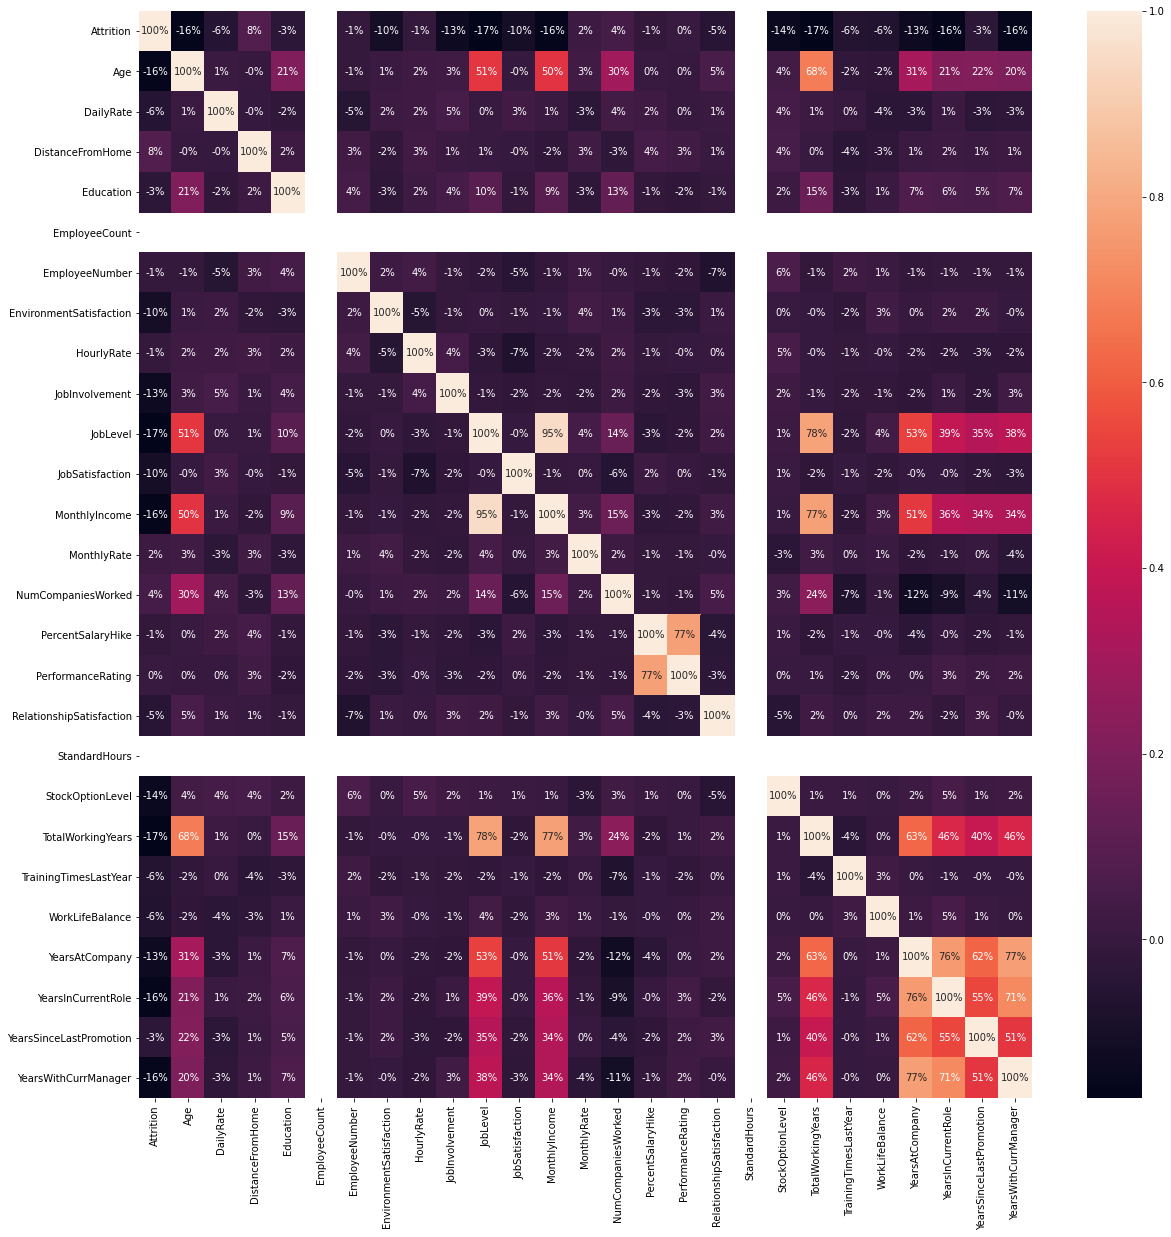

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(A1.corr(),annot=True,fmt='.0%')

In [81]:
X1 = A.drop(["Attrition","EmployeeCount","EmployeeNumber",'Over18', 'StandardHours'], axis=1)
Y1 = A[['Attrition']]

# Univariate Analysis

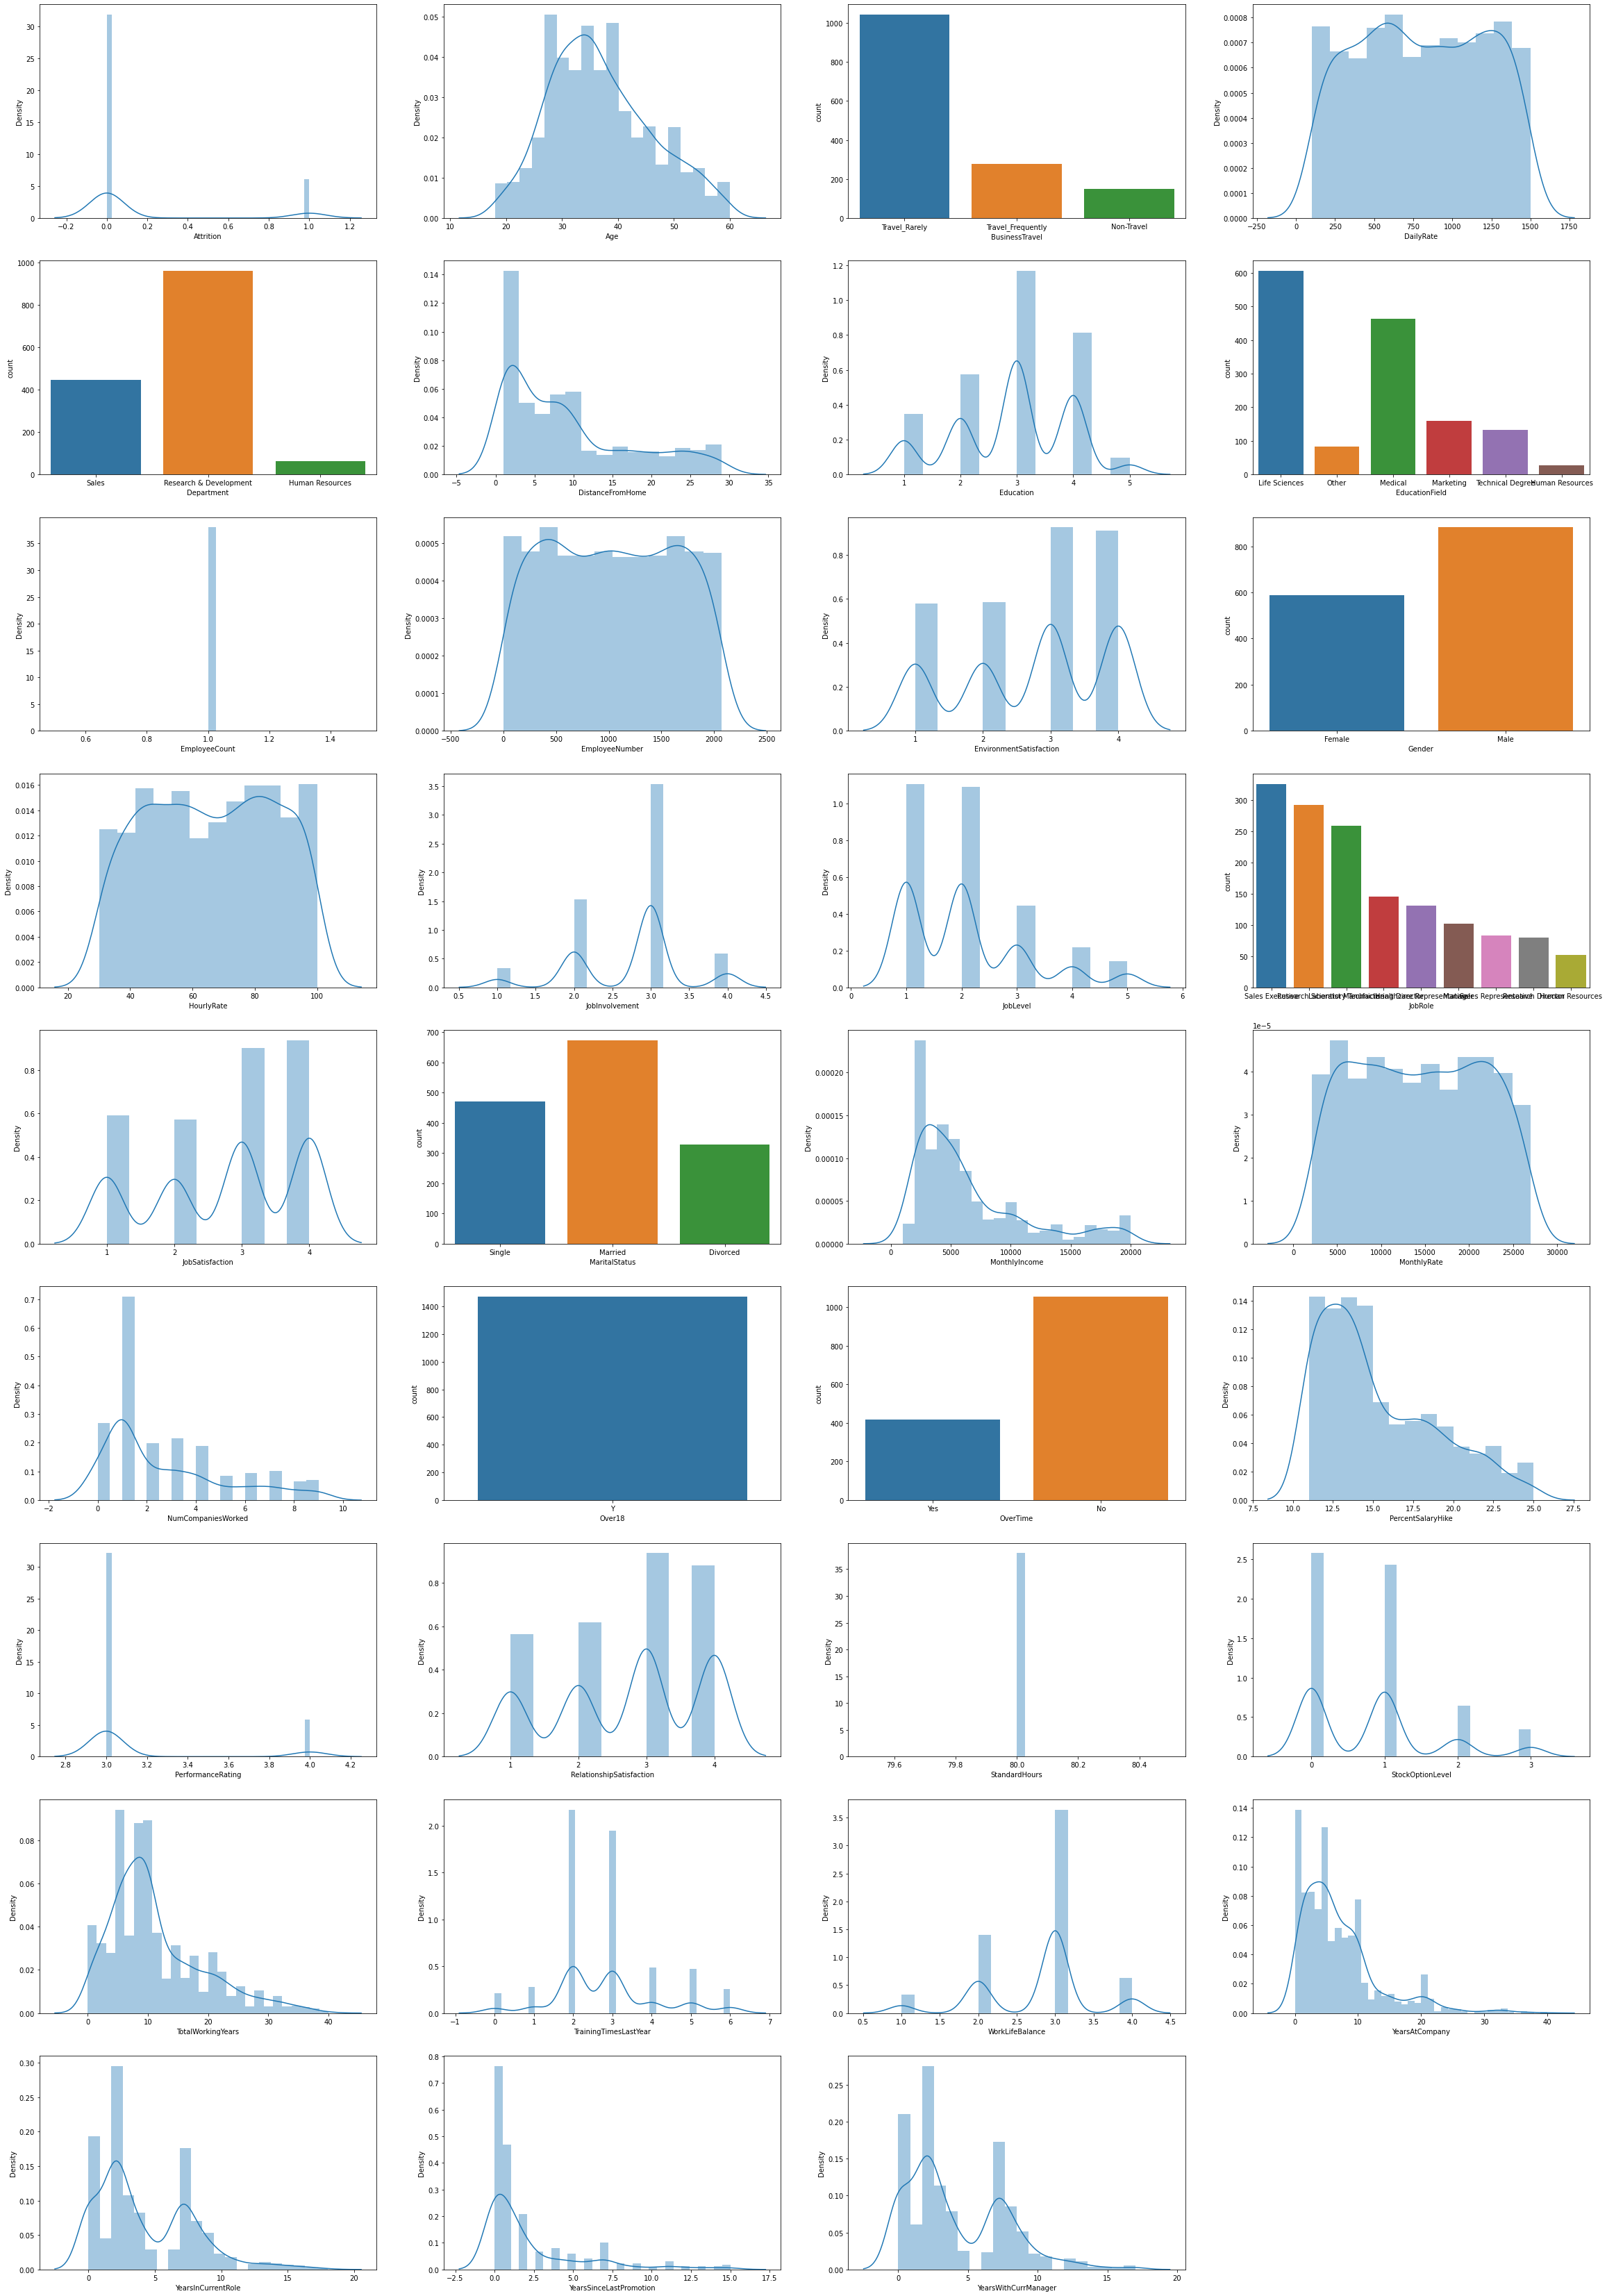

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(40,60))
for i in A1.columns:
    if A1[i].dtypes == 'object':
        plt.subplot(9,4,x)
        sns.countplot(A1[i])
        x = x + 1
    else:
        plt.subplot(9,4,x)
        sns.distplot(A1[i])
        x = x+1

# Bivariate Analysis

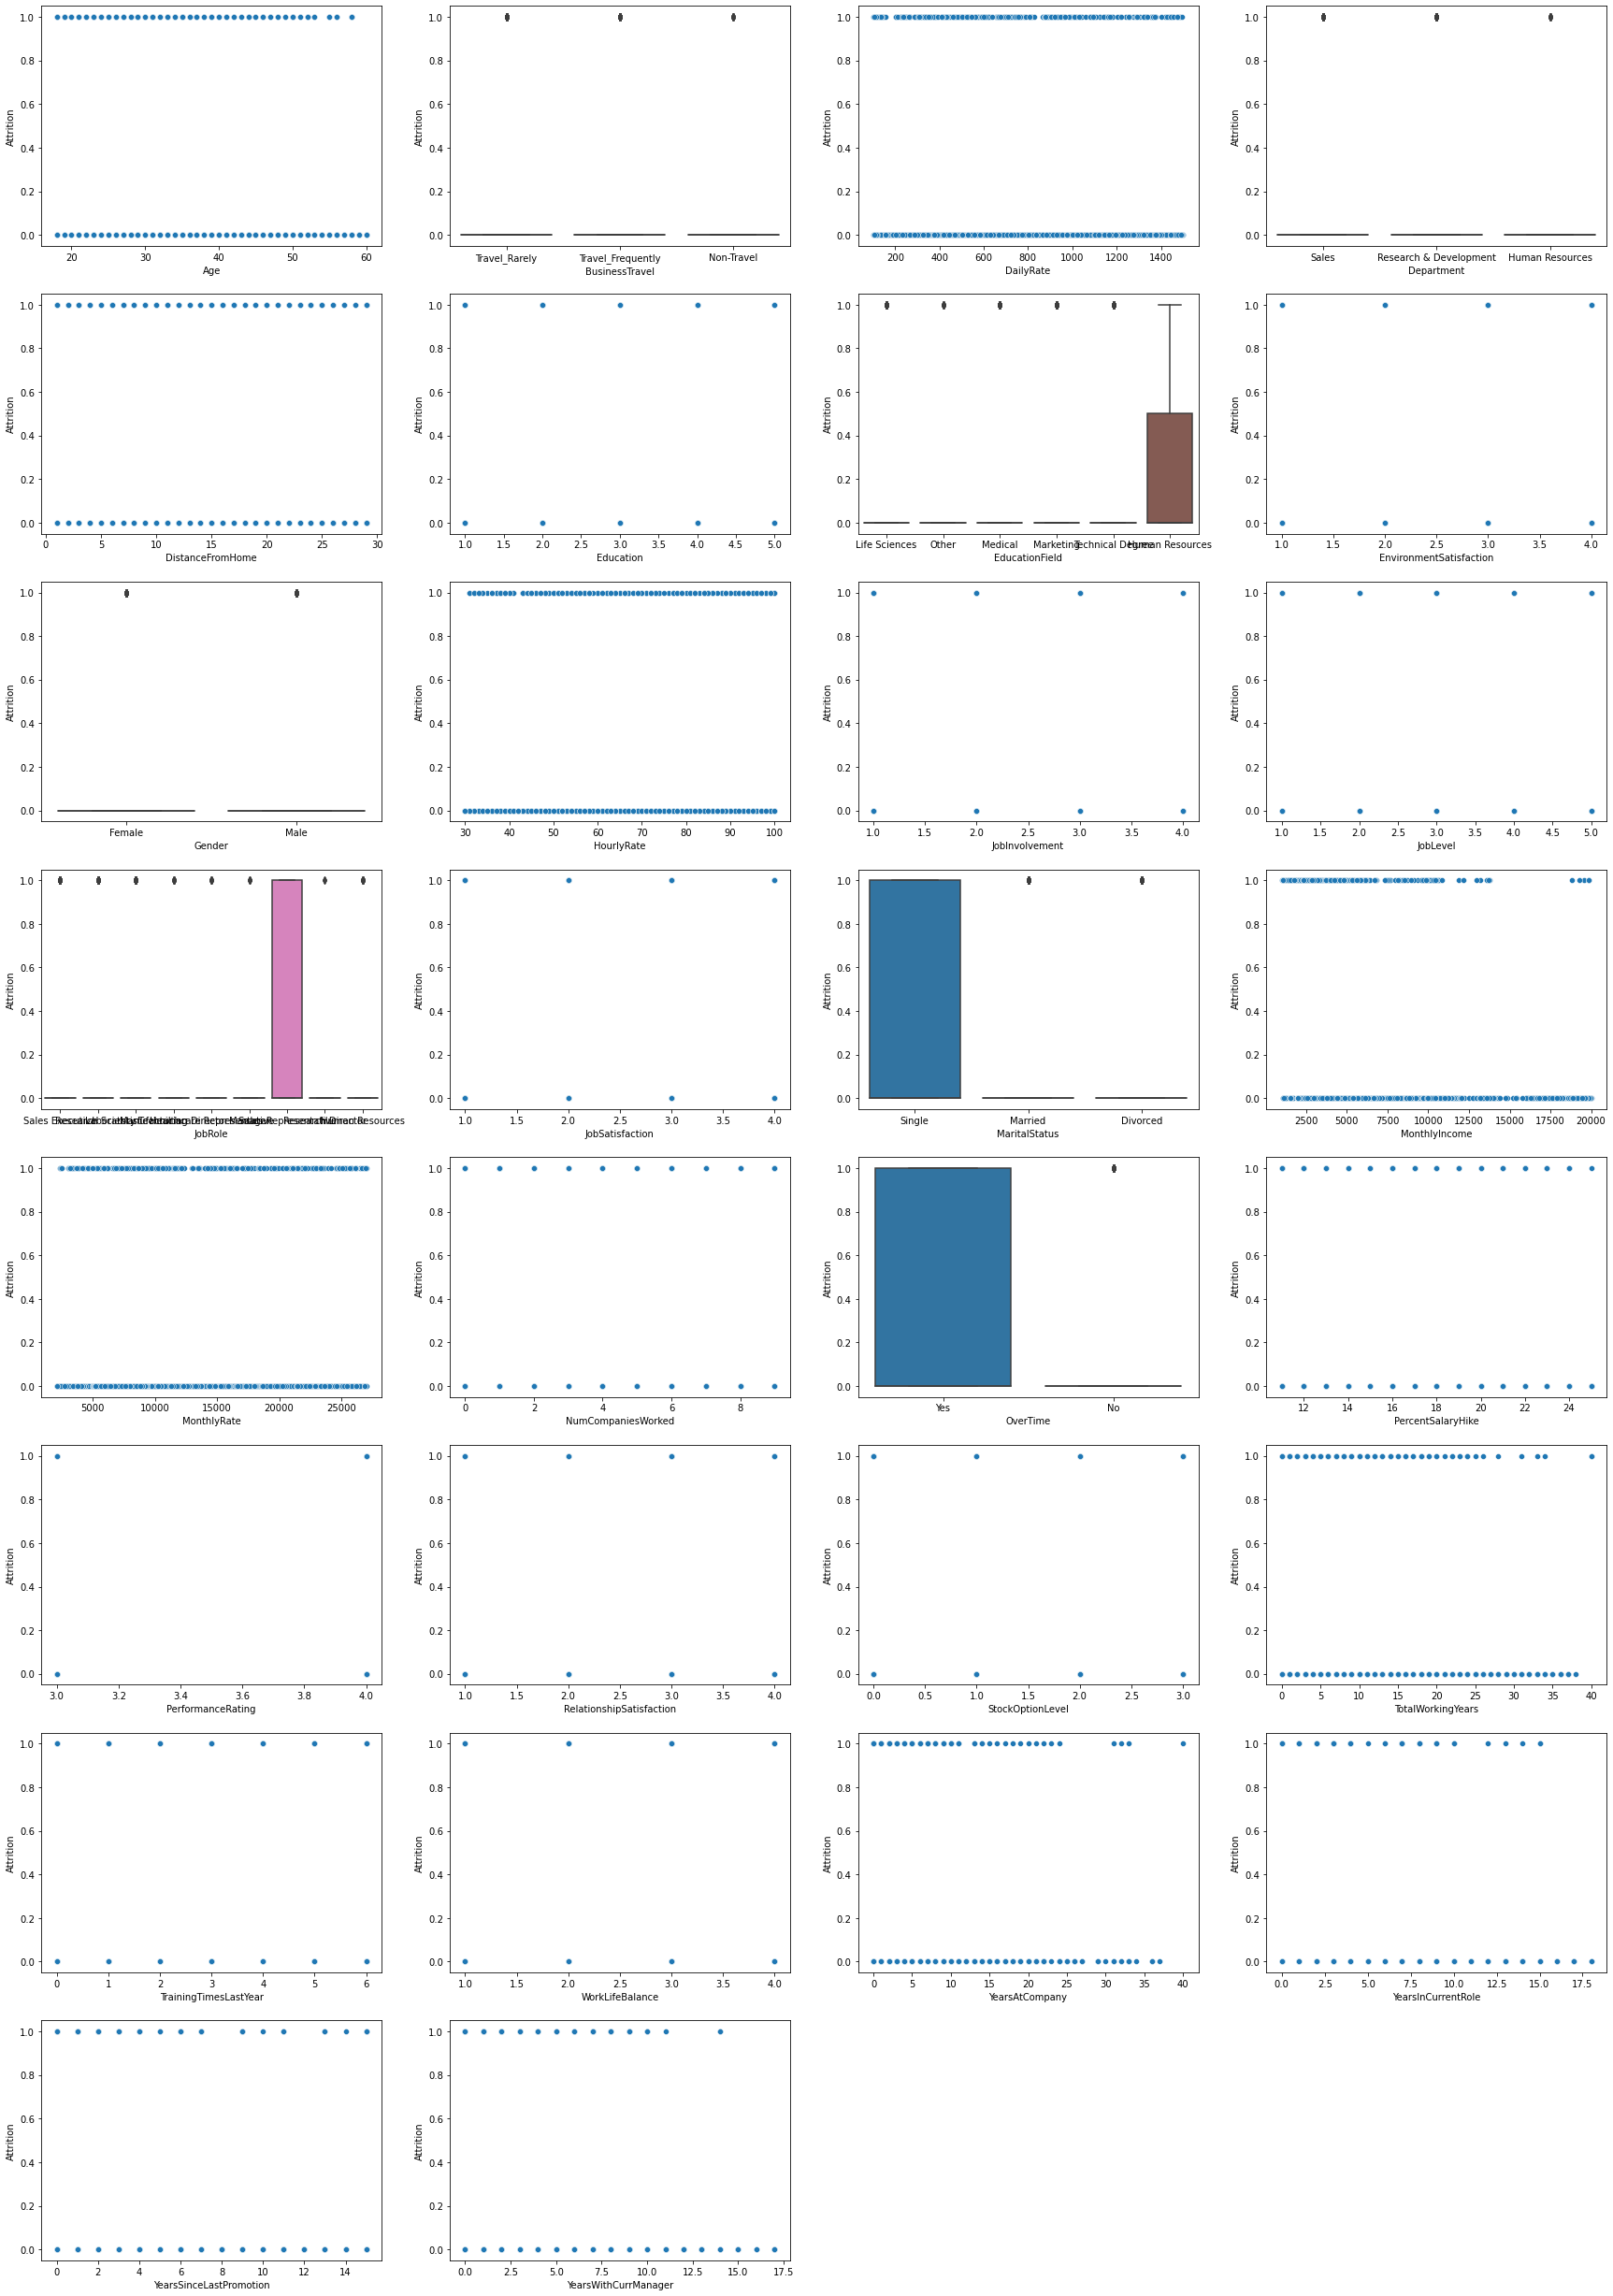

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
plt.figure(figsize=(30,50))
for i in X1.columns:
    if X1[i].dtypes == 'object':
        plt.subplot(9,4,x)
        sns.boxplot(X1[i],Y1['Attrition'])
        x = x + 1
    else:
        plt.subplot(9,4,x)
        sns.scatterplot(X1[i], Y1['Attrition'])
        x=x+1

In [85]:
for i in A1[cat]:
    a = pd.crosstab(A1[i], Y["Attrition"])
    print(a)
    print("===================||===================||===================||===================")

Attrition            0    1
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
===================||===================||===================||===================
Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
===================||===================||===================||===================
Attrition           0   1
EducationField           
Human Resources    20   7
Life Sciences     517  89
Marketing         124  35
Medical           401  63
Other              71  11
Technical Degree  100  32
===================||===================||===================||===================
Attrition    0    1
Gender             
Female     501   87
Male       732  150
===================||===================||===================||===================
Attrition                    0   1
JobRole                           
Healt

In [86]:
X2= preprocessing(X1)

In [166]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain, ytest = train_test_split(X2, Y1,test_size=0.2, random_state=21)

# Decision Tree Classifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
model = dtr.fit(xtrain,ytrain)
predtr = model.predict(xtrain)
predts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 1.0
test Acc ====> 0.7619047619047619


Decision Tree Classifier with max_depth 

In [168]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
tp = {"max_depth": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 2}

In [169]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20,max_depth=2)
model = dtr.fit(xtrain,ytrain)
predtr = model.predict(xtrain)
predts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.842687074829932
test Acc ====> 0.8503401360544217


Decision Tree Classifier with min_samples_leaf

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
tp = {"min_samples_leaf": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_leaf': 10}

In [171]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20, min_samples_leaf=10)
model = dtr.fit(xtrain,ytrain)
predtr = model.predict(xtrain)
predts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.8903061224489796
test Acc ====> 0.8469387755102041


Decision Tree Classifier with min_samples_split

In [172]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
tp = {"min_samples_split": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_split': 18}

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20, min_samples_split=18)
model = dtr.fit(xtrain,ytrain)
predtr = model.predict(xtrain)
predts = model.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.9166666666666665
test Acc ====> 0.8163265306122449


# Adaboost Classifier

In [165]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=20)
abr = AdaBoostClassifier(dtr, random_state=20, n_estimators=11)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),2))
print("test Acc ====>", round(accuracy_score(predts, ytest),2))

train Acc ====> 1.0
test Acc ====> 0.77


Adaboost with max_depth

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=21,max_depth=2)
abr = AdaBoostClassifier(dtr)
tp = {"n_estimators": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'n_estimators': 14}

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=20,max_depth=2)
abr = AdaBoostClassifier(dtr, random_state=20, n_estimators=14)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),2))
print("test Acc ====>", round(accuracy_score(predts, ytest),2))

train Acc ====> 0.91
test Acc ====> 0.87


Adaboost with min_samples_leaf

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=21,min_samples_leaf=10)
abr = AdaBoostClassifier(dtr)
tp = {"n_estimators": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 18}

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=20,min_samples_leaf=10)
abr = AdaBoostClassifier(dtr, random_state=20, n_estimators=18)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),2))
print("test Acc ====>", round(accuracy_score(predts, ytest),2))

train Acc ====> 1.0
test Acc ====> 0.83


Adaboost with min_samples_split

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=21,min_samples_split=18)
abr = AdaBoostClassifier(dtr)
tp = {"n_estimators": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(abr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 11}

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtr = DecisionTreeClassifier(random_state=20,min_samples_split=18)
abr = AdaBoostClassifier(dtr, random_state=20, n_estimators=11)
modelr = abr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),2))
print("test Acc ====>", round(accuracy_score(predts, ytest),2))

train Acc ====> 1.0
test Acc ====> 0.83


# Random Forest Classifier

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(random_state=20)
modelr = rfc.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 1.0
test Acc ====> 0.8605442176870748


Random Forest Classifier with max_depth

In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
tp = {"max_depth": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 9}

In [186]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(random_state=20,max_depth=9)
modelr = rfc.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.95578231292517
test Acc ====> 0.8571428571428571


Random Forest Classifier with min_samples_leaf

In [187]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
tp = {"min_samples_leaf": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_leaf': 2}

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(random_state=20,min_samples_leaf=2)
modelr = rfc.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.9659863945578231
test Acc ====> 0.8605442176870748


In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
tp = {"min_samples_split": range(1,20,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'min_samples_split': 5}

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(random_state=20,min_samples_split=5)
modelr = rfc.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Acc ====>", round(accuracy_score(predtr, ytrain),20))
print("test Acc ====>", round(accuracy_score(predts, ytest),20))

train Acc ====> 0.9770408163265306
test Acc ====> 0.8673469387755102


# Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
modelr = lgr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)

from sklearn.metrics import accuracy_score,confusion_matrix
print("train Acc ====>", round(accuracy_score(predtr, ytrain),2))
print((confusion_matrix(predtr, ytrain),2))

print("test Acc ====>", round(accuracy_score(predts, ytest),2))
print((confusion_matrix(predts, ytest),2))

train Acc ====> 0.89
(array([[965, 105],
       [ 21,  85]], dtype=int64), 2)
test Acc ====> 0.88
(array([[237,  26],
       [ 10,  21]], dtype=int64), 2)


# K Nearest Neighbors

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier()
tp = {"n_neighbors": range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tp, scoring="accuracy", cv = 5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_neighbors': 7}

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=7)
modelr = knr.fit(xtrain,ytrain)
predtr = modelr.predict(xtrain)
predts = modelr.predict(xtest)
from sklearn.metrics import accuracy_score
print("train Error ====>", round(accuracy_score(predtr, ytrain),2))
print("test Error ====>", round(accuracy_score(predts, ytest),2))

train Error ====> 0.86
test Error ====> 0.86


# ANN

In [203]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import keras_tuner as kt

In [248]:
nn=Sequential()
nn.add(Dense(650,activation="relu",input_dim=X1.shape[1]))
nn.add(Dropout(0.4))
nn.add(Dense(650,activation="relu"))
nn.add(Dropout(0.4))
nn.add(Dense(650,activation="relu"))
nn.add(Dropout(0.4))
nn.add(Dense(650,activation="relu"))
nn.add(Dropout(0.4))
nn.add(Dense(1,activation="sigmoid"))

nn.compile(optimizer="Adam", loss="binary_crossentropy",metrics="accuracy")
nn.fit(X2,Y1,validation_split=0.2, batch_size=50, epochs=500)

Epoch 1/500
24/24 [==============================] - 2s 34ms/step - loss: 0.4645 - accuracy: 0.8214 - val_loss: 0.3794 - val_accuracy: 0.8571
Epoch 2/500
24/24 [==============================] - 0s 20ms/step - loss: 0.3582 - accuracy: 0.8520 - val_loss: 0.3433 - val_accuracy: 0.8878
Epoch 3/500
24/24 [==============================] - 0s 20ms/step - loss: 0.3318 - accuracy: 0.8733 - val_loss: 0.3052 - val_accuracy: 0.8844
Epoch 4/500
24/24 [==============================] - 1s 22ms/step - loss: 0.2985 - accuracy: 0.8869 - val_loss: 0.3142 - val_accuracy: 0.8810
Epoch 5/500
24/24 [==============================] - 0s 20ms/step - loss: 0.2761 - accuracy: 0.8937 - val_loss: 0.3287 - val_accuracy: 0.8605
Epoch 6/500
24/24 [==============================] - 0s 20ms/step - loss: 0.2657 - accuracy: 0.8954 - val_loss: 0.3472 - val_accuracy: 0.8912
Epoch 7/500
24/24 [==============================] - 0s 21ms/step - loss: 0.2299 - accuracy: 0.9090 - val_loss: 0.3496 - val_accuracy: 0.8571
Epoch 

24/24 [==============================] - 0s 19ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 1.3060 - val_accuracy: 0.8435
Epoch 59/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 1.4744 - val_accuracy: 0.8639
Epoch 60/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.9348 - val_accuracy: 0.8401
Epoch 61/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.9283 - val_accuracy: 0.8537
Epoch 62/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0245 - accuracy: 0.9889 - val_loss: 0.9443 - val_accuracy: 0.8401
Epoch 63/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 1.0287 - val_accuracy: 0.8299
Epoch 64/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0221 - accuracy: 0.9915 - val_loss: 1.0703 - val_accuracy: 0.8537
Epoch 65/500

24/24 [==============================] - 0s 20ms/step - loss: 0.0082 - accuracy: 0.9966 - val_loss: 1.5419 - val_accuracy: 0.8503
Epoch 116/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0212 - accuracy: 0.9949 - val_loss: 1.1585 - val_accuracy: 0.8537
Epoch 117/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0234 - accuracy: 0.9966 - val_loss: 1.1404 - val_accuracy: 0.8537
Epoch 118/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.7477 - val_accuracy: 0.8503
Epoch 119/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0133 - accuracy: 0.9966 - val_loss: 0.9244 - val_accuracy: 0.8605
Epoch 120/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 1.0062 - val_accuracy: 0.8707
Epoch 121/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 1.1674 - val_accuracy: 0.8639
Epoch 

Epoch 172/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0046 - accuracy: 0.9966 - val_loss: 1.4882 - val_accuracy: 0.8537
Epoch 173/500
24/24 [==============================] - 0s 17ms/step - loss: 9.5256e-04 - accuracy: 1.0000 - val_loss: 1.6169 - val_accuracy: 0.8605
Epoch 174/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 1.8011 - val_accuracy: 0.8435
Epoch 175/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 1.6277 - val_accuracy: 0.8537
Epoch 176/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0174 - accuracy: 0.9974 - val_loss: 1.6680 - val_accuracy: 0.8435
Epoch 177/500
24/24 [==============================] - 0s 17ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 1.6395 - val_accuracy: 0.8571
Epoch 178/500
24/24 [==============================] - 0s 17ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 1.6888 - val_accur

Epoch 229/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 1.5826 - val_accuracy: 0.8605
Epoch 230/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 1.8382 - val_accuracy: 0.8673
Epoch 231/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 1.7480 - val_accuracy: 0.8605
Epoch 232/500
24/24 [==============================] - 0s 18ms/step - loss: 0.0319 - accuracy: 0.9923 - val_loss: 0.8340 - val_accuracy: 0.8673
Epoch 233/500
24/24 [==============================] - 0s 17ms/step - loss: 0.0113 - accuracy: 0.9974 - val_loss: 1.4936 - val_accuracy: 0.8639
Epoch 234/500
24/24 [==============================] - 0s 18ms/step - loss: 9.2049e-04 - accuracy: 1.0000 - val_loss: 1.9749 - val_accuracy: 0.8605
Epoch 235/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0026 - accuracy: 0.9983 - val_loss: 1.9335 - val_accur

Epoch 286/500
24/24 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.9092 - val_accuracy: 0.8503
Epoch 287/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.9448 - val_accuracy: 0.8537
Epoch 288/500
24/24 [==============================] - 0s 19ms/step - loss: 9.5991e-04 - accuracy: 1.0000 - val_loss: 2.0891 - val_accuracy: 0.8537
Epoch 289/500
24/24 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 0.9991 - val_loss: 2.3059 - val_accuracy: 0.8537
Epoch 290/500
24/24 [==============================] - 0s 21ms/step - loss: 6.4693e-05 - accuracy: 1.0000 - val_loss: 2.4087 - val_accuracy: 0.8571
Epoch 291/500
24/24 [==============================] - 1s 22ms/step - loss: 8.0105e-04 - accuracy: 0.9991 - val_loss: 2.4054 - val_accuracy: 0.8435
Epoch 292/500
24/24 [==============================] - 0s 20ms/step - loss: 3.4375e-04 - accuracy: 1.0000 - val_loss: 2.4587

24/24 [==============================] - 0s 20ms/step - loss: 0.0049 - accuracy: 0.9974 - val_loss: 1.8896 - val_accuracy: 0.8537
Epoch 343/500
24/24 [==============================] - 0s 19ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 1.5992 - val_accuracy: 0.8537
Epoch 344/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 1.4619 - val_accuracy: 0.8503
Epoch 345/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0015 - accuracy: 0.9991 - val_loss: 1.7371 - val_accuracy: 0.8537
Epoch 346/500
24/24 [==============================] - 0s 20ms/step - loss: 0.0142 - accuracy: 0.9974 - val_loss: 1.9826 - val_accuracy: 0.8401
Epoch 347/500
24/24 [==============================] - 0s 19ms/step - loss: 8.8772e-04 - accuracy: 1.0000 - val_loss: 2.0860 - val_accuracy: 0.8503
Epoch 348/500
24/24 [==============================] - 1s 21ms/step - loss: 0.0030 - accuracy: 0.9983 - val_loss: 2.1881 - val_accuracy: 0.8469
Ep

Epoch 399/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 1.9294 - val_accuracy: 0.8571
Epoch 400/500
24/24 [==============================] - 1s 22ms/step - loss: 0.0086 - accuracy: 0.9983 - val_loss: 1.8853 - val_accuracy: 0.8776
Epoch 401/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 1.7330 - val_accuracy: 0.8605
Epoch 402/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 2.0436 - val_accuracy: 0.8605
Epoch 403/500
24/24 [==============================] - 1s 23ms/step - loss: 6.6530e-04 - accuracy: 1.0000 - val_loss: 2.3876 - val_accuracy: 0.8537
Epoch 404/500
24/24 [==============================] - 1s 24ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 2.9341 - val_accuracy: 0.8639
Epoch 405/500
24/24 [==============================] - 1s 23ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 2.3462 - val_accur

24/24 [==============================] - 0s 21ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 2.7468 - val_accuracy: 0.8639
Epoch 456/500
24/24 [==============================] - 0s 21ms/step - loss: 5.2790e-04 - accuracy: 1.0000 - val_loss: 2.8712 - val_accuracy: 0.8571
Epoch 457/500
24/24 [==============================] - 0s 21ms/step - loss: 1.7054e-04 - accuracy: 1.0000 - val_loss: 2.9895 - val_accuracy: 0.8673
Epoch 458/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 2.7938 - val_accuracy: 0.8605
Epoch 459/500
24/24 [==============================] - 1s 22ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 2.6990 - val_accuracy: 0.8605
Epoch 460/500
24/24 [==============================] - 1s 21ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 2.8244 - val_accuracy: 0.8605
Epoch 461/500
24/24 [==============================] - 0s 21ms/step - loss: 0.0067 - accuracy: 0.9974 - val_loss: 2.2262 - val_accuracy: 0.857

In [249]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(1500,input_dim=xtrain.shape[1]))
    x = hp.Int("units",min_value=20,max_value=1600,step=35)
    nn.add(Dense(units=x))
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    nn.add(Dropout(rate=y))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [250]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_accuracy",
            max_epochs=10,
            directory="C:/Users/Anuj.kumar/Desktop/PROJECT",
            project_name="K4")

In [253]:
tuner.search(X2,Y1,epochs=500, validation_split=0.2)

Trial 42 Complete [00h 00m 23s]
val_accuracy: 0.8979591727256775

Best val_accuracy So Far: 0.9149659872055054
Total elapsed time: 00h 05m 13s
INFO:tensorflow:Oracle triggered exit


# Dense Layers

In [254]:
tuner.get_best_hyperparameters()[0].get("units")

1560

# Dropout Layers

In [255]:
tuner.get_best_hyperparameters()[0].get("rate")

0.2

In [256]:
nn=Sequential()
nn.add(Dense(1560,activation="relu",input_dim=X1.shape[1]))
nn.add(Dropout(0.2))
nn.add(Dense(1560,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1560,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1560,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation="sigmoid"))

nn.compile(optimizer="Adam", loss="binary_crossentropy",metrics="accuracy")
nn.fit(X2,Y1,validation_split=0.2, batch_size=50, epochs=500)

Epoch 1/500
24/24 [==============================] - 3s 87ms/step - loss: 0.4543 - accuracy: 0.8095 - val_loss: 0.3534 - val_accuracy: 0.8741
Epoch 2/500
24/24 [==============================] - 2s 81ms/step - loss: 0.3350 - accuracy: 0.8673 - val_loss: 0.3212 - val_accuracy: 0.8844
Epoch 3/500
24/24 [==============================] - 2s 83ms/step - loss: 0.2793 - accuracy: 0.8997 - val_loss: 0.3569 - val_accuracy: 0.8741
Epoch 4/500
24/24 [==============================] - 2s 78ms/step - loss: 0.2427 - accuracy: 0.9014 - val_loss: 0.3331 - val_accuracy: 0.8741
Epoch 5/500
24/24 [==============================] - 2s 73ms/step - loss: 0.1904 - accuracy: 0.9277 - val_loss: 0.3712 - val_accuracy: 0.8776
Epoch 6/500
24/24 [==============================] - 2s 79ms/step - loss: 0.1519 - accuracy: 0.9388 - val_loss: 0.4204 - val_accuracy: 0.8707
Epoch 7/500
24/24 [==============================] - 2s 85ms/step - loss: 0.1148 - accuracy: 0.9549 - val_loss: 0.5561 - val_accuracy: 0.8571
Epoch 

24/24 [==============================] - 2s 99ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 1.2394 - val_accuracy: 0.8605
Epoch 59/500
24/24 [==============================] - 2s 94ms/step - loss: 9.4053e-04 - accuracy: 1.0000 - val_loss: 1.9909 - val_accuracy: 0.8469
Epoch 60/500
24/24 [==============================] - 2s 90ms/step - loss: 0.0026 - accuracy: 0.9983 - val_loss: 2.3743 - val_accuracy: 0.8401
Epoch 61/500
24/24 [==============================] - 2s 96ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 2.9797 - val_accuracy: 0.8673
Epoch 62/500
24/24 [==============================] - 2s 100ms/step - loss: 0.0155 - accuracy: 0.9966 - val_loss: 2.3523 - val_accuracy: 0.8503
Epoch 63/500
24/24 [==============================] - 2s 100ms/step - loss: 0.0167 - accuracy: 0.9966 - val_loss: 1.7198 - val_accuracy: 0.8571
Epoch 64/500
24/24 [==============================] - 2s 96ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 1.3439 - val_accuracy: 0.8503
Epoch 

24/24 [==============================] - 3s 117ms/step - loss: 5.1428e-06 - accuracy: 1.0000 - val_loss: 2.4205 - val_accuracy: 0.8741
Epoch 115/500
24/24 [==============================] - 3s 146ms/step - loss: 4.9716e-06 - accuracy: 1.0000 - val_loss: 2.4339 - val_accuracy: 0.8741
Epoch 116/500
24/24 [==============================] - 3s 118ms/step - loss: 5.8721e-06 - accuracy: 1.0000 - val_loss: 2.4457 - val_accuracy: 0.8741
Epoch 117/500
24/24 [==============================] - 3s 107ms/step - loss: 7.8962e-06 - accuracy: 1.0000 - val_loss: 2.4639 - val_accuracy: 0.8741
Epoch 118/500
24/24 [==============================] - 2s 103ms/step - loss: 1.7043e-06 - accuracy: 1.0000 - val_loss: 2.4736 - val_accuracy: 0.8741
Epoch 119/500
24/24 [==============================] - 3s 108ms/step - loss: 2.0931e-05 - accuracy: 1.0000 - val_loss: 2.4944 - val_accuracy: 0.8741
Epoch 120/500
24/24 [==============================] - 3s 107ms/step - loss: 3.0286e-06 - accuracy: 1.0000 - val_loss: 2

24/24 [==============================] - 3s 137ms/step - loss: 0.0117 - accuracy: 0.9983 - val_loss: 3.3499 - val_accuracy: 0.8707
Epoch 171/500
24/24 [==============================] - 4s 162ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 3.2885 - val_accuracy: 0.8537
Epoch 172/500
24/24 [==============================] - 4s 187ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 3.5127 - val_accuracy: 0.8673
Epoch 173/500
24/24 [==============================] - 4s 168ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 3.0410 - val_accuracy: 0.8503
Epoch 174/500
24/24 [==============================] - 4s 152ms/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 3.3641 - val_accuracy: 0.8776
Epoch 175/500
24/24 [==============================] - 4s 161ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 3.0119 - val_accuracy: 0.8810
Epoch 176/500
24/24 [==============================] - 4s 152ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 2.6953 - val_accuracy: 0.8673

Epoch 226/500
24/24 [==============================] - 2s 84ms/step - loss: 0.0014 - accuracy: 0.9991 - val_loss: 2.6496 - val_accuracy: 0.8707
Epoch 227/500
24/24 [==============================] - 2s 86ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 3.3069 - val_accuracy: 0.8571
Epoch 228/500
24/24 [==============================] - 2s 85ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 1.7482 - val_accuracy: 0.8503
Epoch 229/500
24/24 [==============================] - 2s 85ms/step - loss: 4.8841e-04 - accuracy: 1.0000 - val_loss: 2.1042 - val_accuracy: 0.8503
Epoch 230/500
24/24 [==============================] - 2s 84ms/step - loss: 3.4647e-04 - accuracy: 1.0000 - val_loss: 2.5873 - val_accuracy: 0.8571
Epoch 231/500
24/24 [==============================] - 2s 81ms/step - loss: 3.8797e-05 - accuracy: 1.0000 - val_loss: 2.7383 - val_accuracy: 0.8571
Epoch 232/500
24/24 [==============================] - 2s 80ms/step - loss: 1.4486e-05 - accuracy: 1.0000 - val_loss: 2.7774

Epoch 282/500
24/24 [==============================] - 2s 85ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 3.4413 - val_accuracy: 0.8333
Epoch 283/500
24/24 [==============================] - 2s 90ms/step - loss: 9.1919e-04 - accuracy: 0.9991 - val_loss: 3.5454 - val_accuracy: 0.8537
Epoch 284/500
24/24 [==============================] - 2s 94ms/step - loss: 0.0062 - accuracy: 0.9974 - val_loss: 4.0571 - val_accuracy: 0.8639
Epoch 285/500
24/24 [==============================] - 3s 105ms/step - loss: 0.0231 - accuracy: 0.9957 - val_loss: 2.7906 - val_accuracy: 0.8673
Epoch 286/500
24/24 [==============================] - 2s 98ms/step - loss: 0.0232 - accuracy: 0.9966 - val_loss: 2.2825 - val_accuracy: 0.8265
Epoch 287/500
24/24 [==============================] - 2s 103ms/step - loss: 3.7330e-04 - accuracy: 1.0000 - val_loss: 3.3376 - val_accuracy: 0.8503
Epoch 288/500
24/24 [==============================] - 2s 104ms/step - loss: 1.8424e-04 - accuracy: 1.0000 - val_loss: 3.5504 

24/24 [==============================] - 2s 87ms/step - loss: 5.4198e-09 - accuracy: 1.0000 - val_loss: 4.9007 - val_accuracy: 0.8503
Epoch 338/500
24/24 [==============================] - 2s 85ms/step - loss: 1.6027e-08 - accuracy: 1.0000 - val_loss: 4.9009 - val_accuracy: 0.8503
Epoch 339/500
24/24 [==============================] - 2s 89ms/step - loss: 1.3469e-08 - accuracy: 1.0000 - val_loss: 4.9011 - val_accuracy: 0.8503
Epoch 340/500
24/24 [==============================] - 2s 87ms/step - loss: 1.6715e-08 - accuracy: 1.0000 - val_loss: 4.9013 - val_accuracy: 0.8503
Epoch 341/500
24/24 [==============================] - 2s 85ms/step - loss: 4.4108e-05 - accuracy: 1.0000 - val_loss: 4.9865 - val_accuracy: 0.8503
Epoch 342/500
24/24 [==============================] - 2s 88ms/step - loss: 3.8124e-07 - accuracy: 1.0000 - val_loss: 5.4204 - val_accuracy: 0.8469
Epoch 343/500
24/24 [==============================] - 2s 83ms/step - loss: 1.1855e-06 - accuracy: 1.0000 - val_loss: 5.4534 -

24/24 [==============================] - 2s 81ms/step - loss: 2.7938e-07 - accuracy: 1.0000 - val_loss: 4.7519 - val_accuracy: 0.8537
Epoch 394/500
24/24 [==============================] - 2s 85ms/step - loss: 1.0611e-06 - accuracy: 1.0000 - val_loss: 4.7637 - val_accuracy: 0.8537
Epoch 395/500
24/24 [==============================] - 2s 86ms/step - loss: 7.2035e-08 - accuracy: 1.0000 - val_loss: 4.7718 - val_accuracy: 0.8537
Epoch 396/500
24/24 [==============================] - 2s 95ms/step - loss: 1.9272e-04 - accuracy: 1.0000 - val_loss: 5.2619 - val_accuracy: 0.8639
Epoch 397/500
24/24 [==============================] - 2s 75ms/step - loss: 0.0010 - accuracy: 0.9991 - val_loss: 5.0225 - val_accuracy: 0.8401
Epoch 398/500
24/24 [==============================] - 2s 78ms/step - loss: 0.0243 - accuracy: 0.9974 - val_loss: 3.7064 - val_accuracy: 0.8367
Epoch 399/500
24/24 [==============================] - 2s 89ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 3.1615 - val_accurac

24/24 [==============================] - 2s 81ms/step - loss: 0.0072 - accuracy: 0.9974 - val_loss: 2.9470 - val_accuracy: 0.8741
Epoch 449/500
24/24 [==============================] - 2s 77ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 2.9395 - val_accuracy: 0.8503
Epoch 450/500
24/24 [==============================] - 2s 76ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.7041 - val_accuracy: 0.8571
Epoch 451/500
24/24 [==============================] - 2s 79ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 3.5717 - val_accuracy: 0.8503
Epoch 452/500
24/24 [==============================] - 2s 82ms/step - loss: 7.4406e-04 - accuracy: 0.9991 - val_loss: 4.0112 - val_accuracy: 0.8605
Epoch 453/500
24/24 [==============================] - 2s 82ms/step - loss: 1.6496e-05 - accuracy: 1.0000 - val_loss: 4.1693 - val_accuracy: 0.8639
Epoch 454/500
24/24 [==============================] - 2s 86ms/step - loss: 8.5533e-05 - accuracy: 1.0000 - val_loss: 4.1597 - val_accuracy: 0

In [263]:
Prediction = (nn.predict(X2)>0.5).astype("int32")

In [260]:
A1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [264]:
A1["pred_Attrition"]=(nn.predict(X2)>0.5).astype("int32")

In [265]:
AA1=A1[["Attrition","pred_Attrition"]]

In [266]:
AA1

,Attrition,pred_Attrition
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
